In [1]:
import os

import scipy as sp
import scipy.misc
import imageio
import imreg_dft as ird

import cv2 as cv

import numpy as np
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

import time
from datetime import datetime
import pickle
import re

import skimage
from skimage.draw import random_shapes

from baseIncludesReg1 import *
from baseDynamic1 import *

In [2]:
randSeed = 29340237
np.random.seed(randSeed)

In [3]:
# Image and scene sizes
imgHeight,imgWidth = 256,256  # 500,500
sceneHeight,sceneWidth = 1024,1024 # 2048,2048  # 1024,1024

In [4]:
silhouetteFlag = True  # Set to True to process silhouette
shapeFlag = False      # Set to True to process random shapes

In [5]:
shapeDescs,kk = buildLexicon(imgHeight,imgWidth,silhouetteFlag,shapeFlag)

<IPython.core.display.Javascript object>


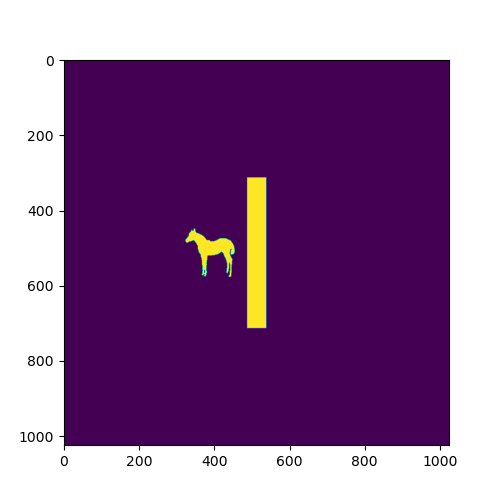

In [6]:
shape = 253
width = 25
height = 200

%matplotlib notebook

fig,axs = plt.subplots(figsize=(5,5))

for t in range(20):
    scene = np.zeros((sceneHeight,sceneWidth),np.uint8)
    xcoord = sceneWidth//2 + imgWidth//2 - t*20
    ycoord = sceneHeight//2 - imgHeight//2
    scene = cv.rectangle(scene,(sceneWidth//2-width,sceneHeight//2-height),(sceneWidth//2+width,sceneHeight//2+height),(255),-1)
    scene[ycoord:ycoord+imgHeight,xcoord:xcoord+imgWidth] = cv.bitwise_or(scene[ycoord:ycoord+imgHeight,xcoord:xcoord+imgWidth],255-shapeDescs[shape]['imag'])
    axs.imshow(scene)
    fig.canvas.draw()

In [7]:
%matplotlib inline

In [8]:
plotFlag1 = True
matchContour = False
silhouetteFlag = True
if matchContour:
    matchThreshold = 0.40
else:
    if silhouetteFlag:
        matchThreshold = 0.90  # "Real" images have stronger discrimination
    else:
        matchThreshold = 0.95
learnDict = {}
labelDict = 0

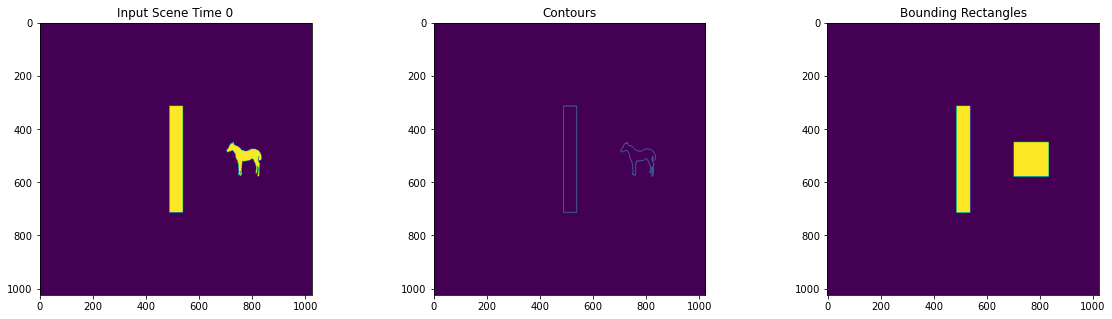

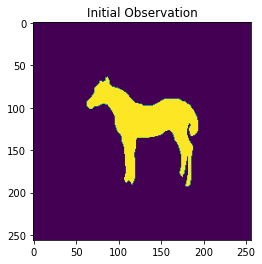



Size of Memory   1     Cold Start:  Learning First Object      Elapsed time:   0.071






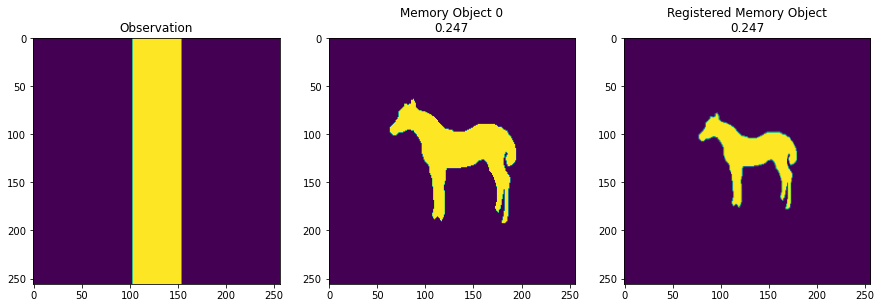

Best Score:   0.24738903067982068


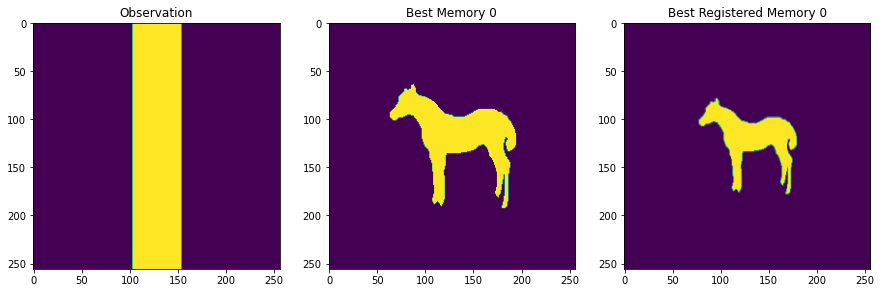



Size of Memory   2     Learning New Object 0.247               Elapsed time:   0.698






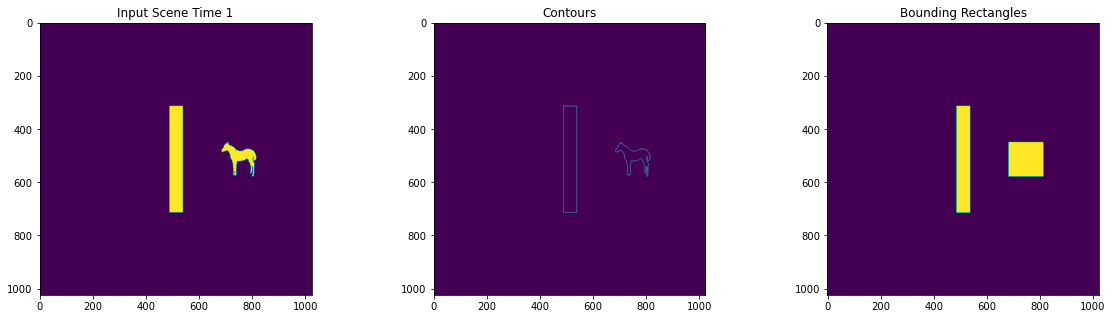

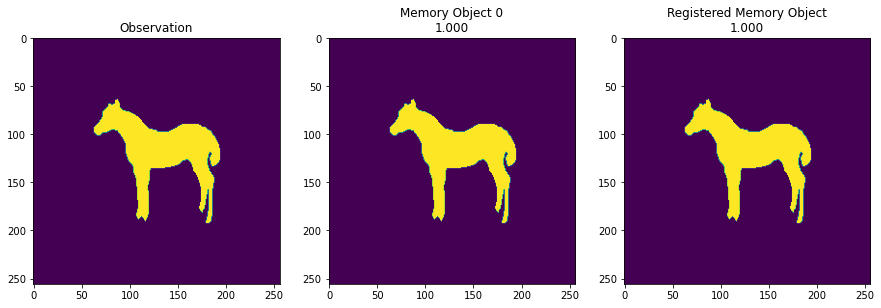

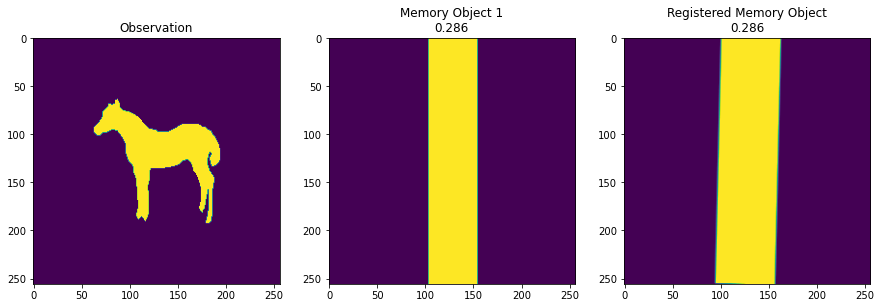

Best Score:   1.0


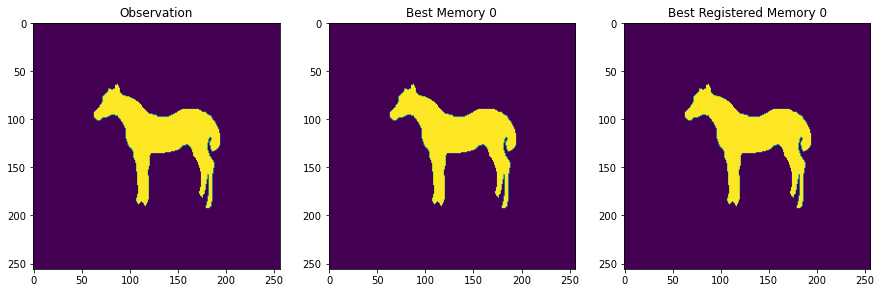



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.013






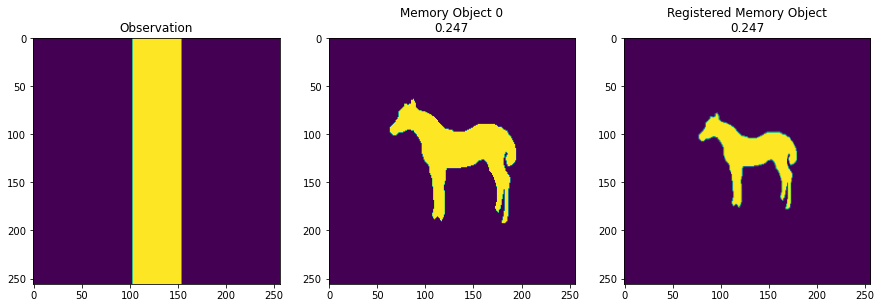

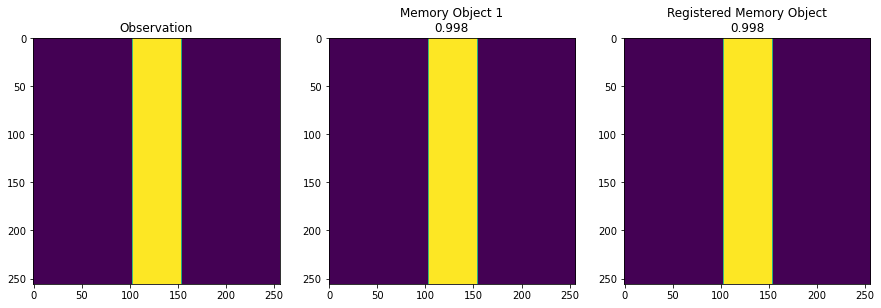

Best Score:   0.998044956517216


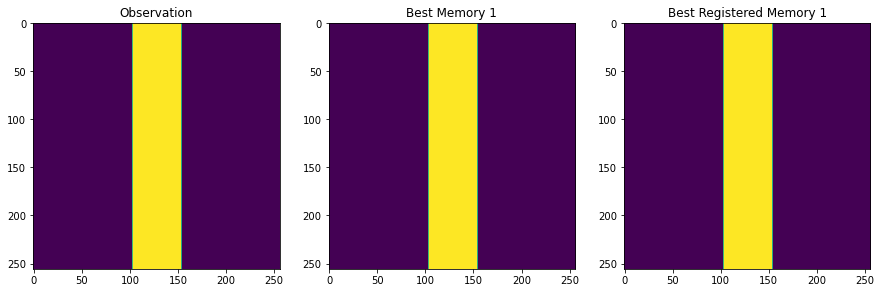



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   1.068






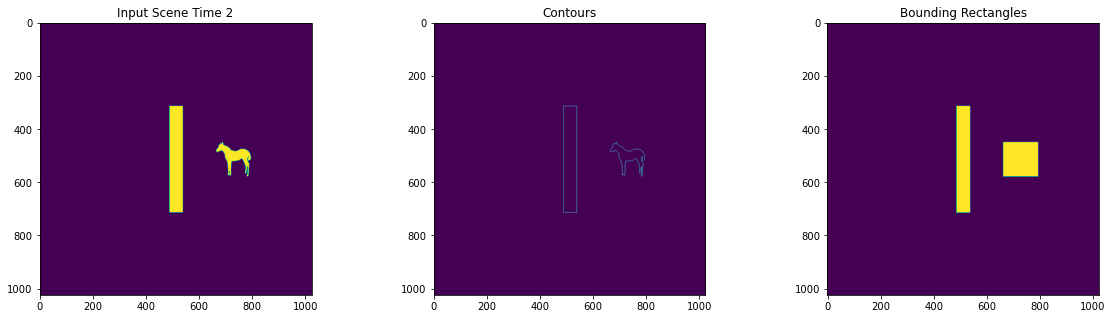

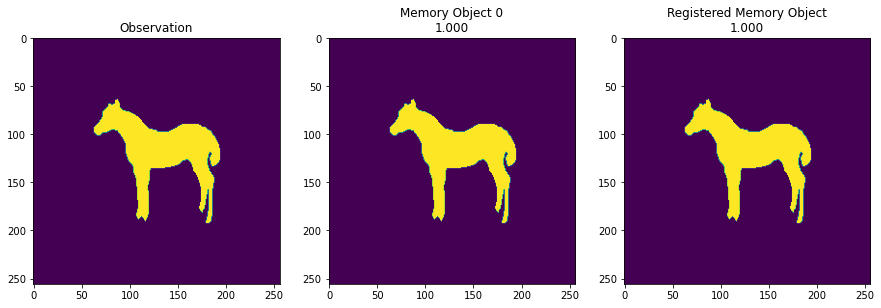

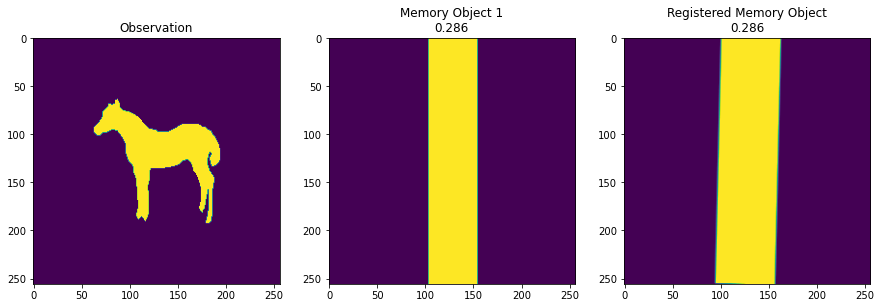

Best Score:   1.0


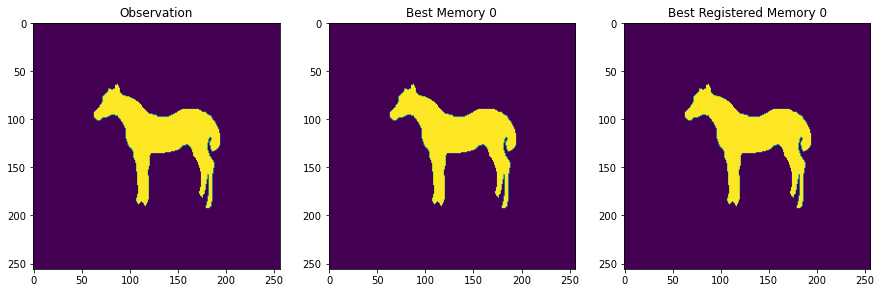



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.058






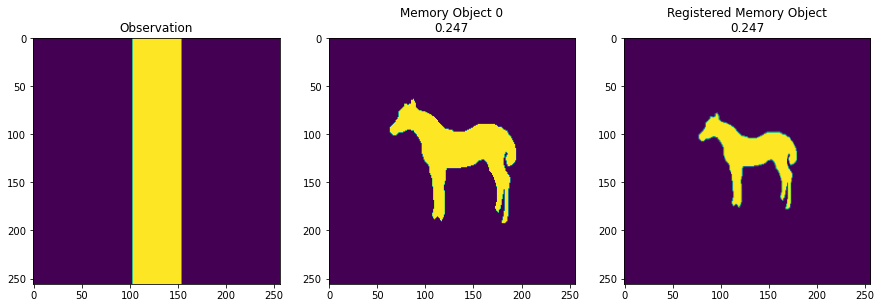

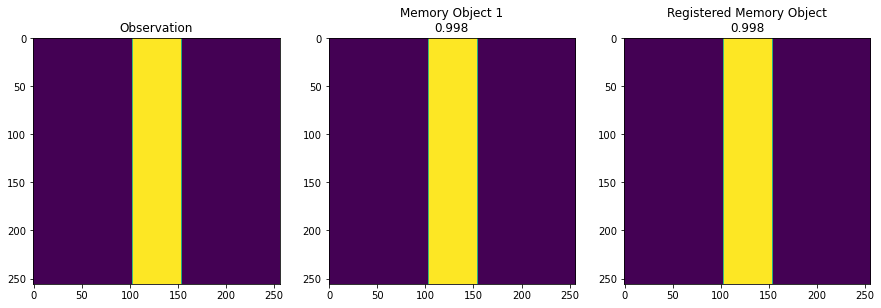

Best Score:   0.998044956517216


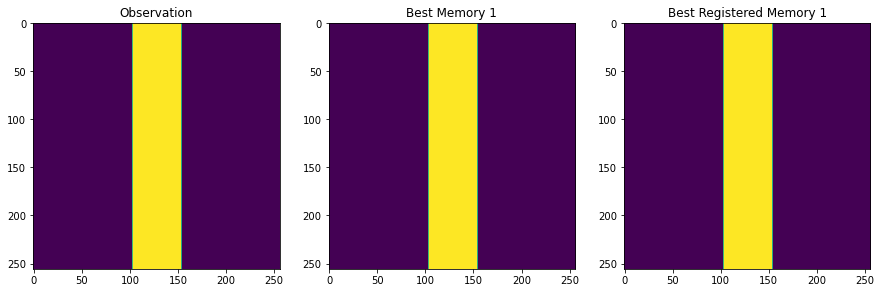



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   0.951






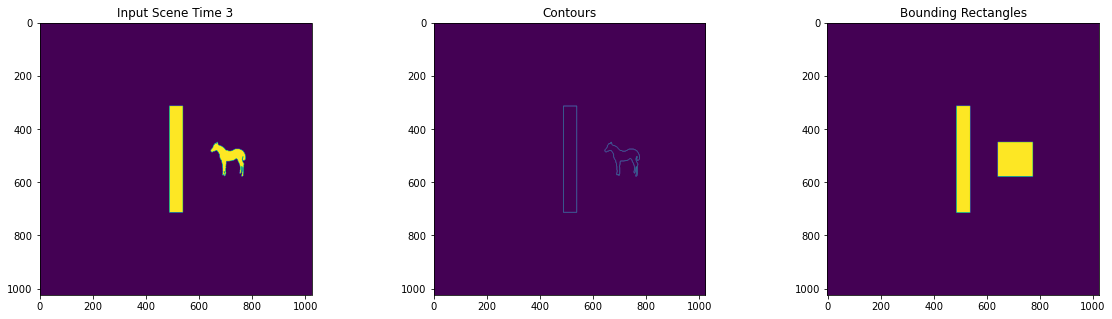

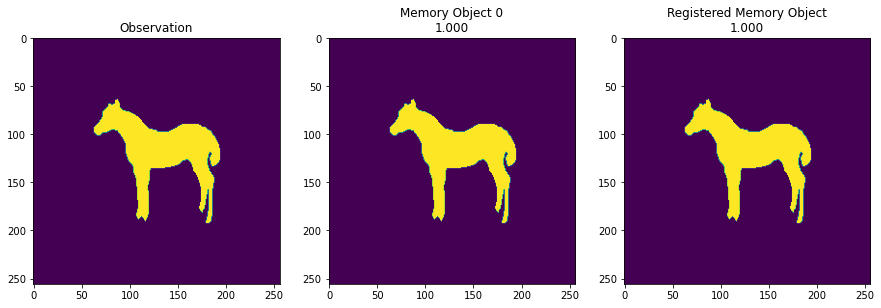

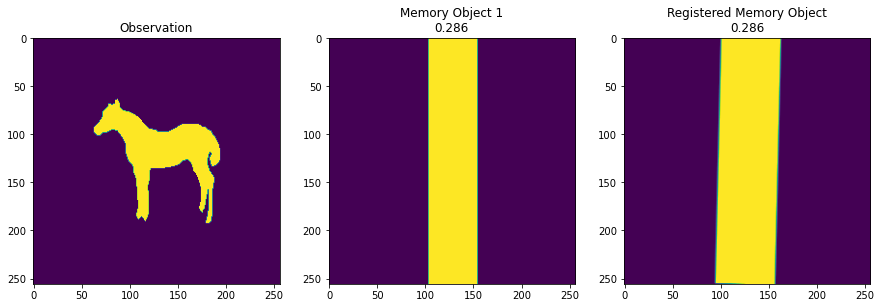

Best Score:   1.0


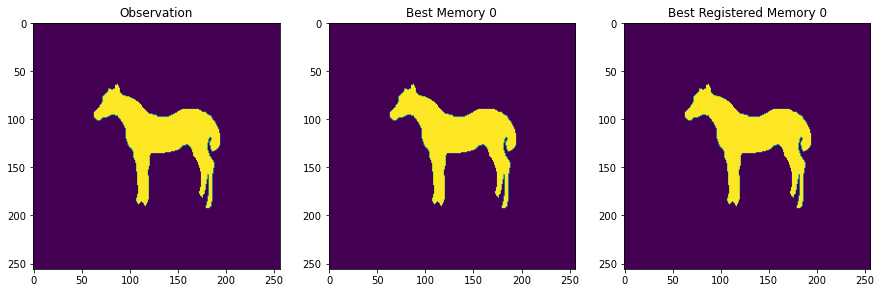



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.039






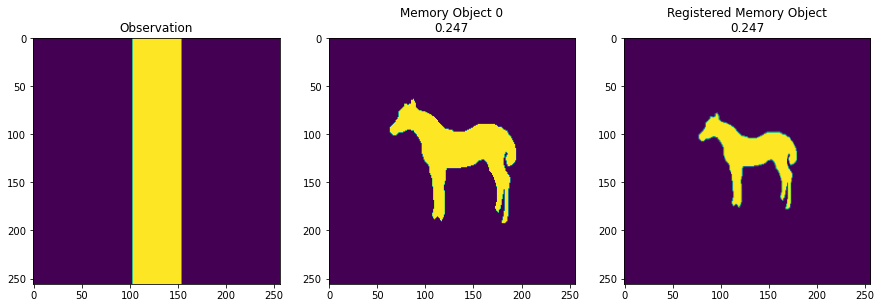

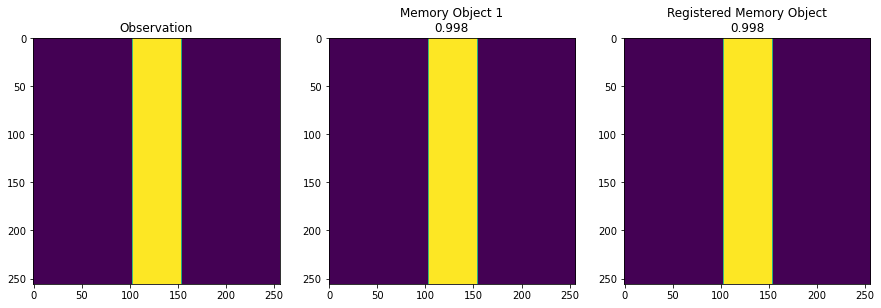

Best Score:   0.998044956517216


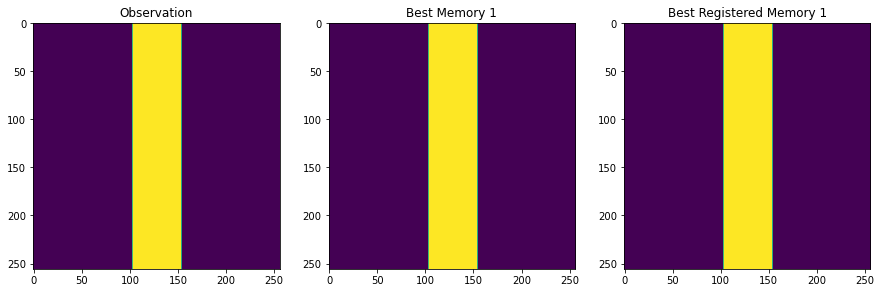



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   0.944






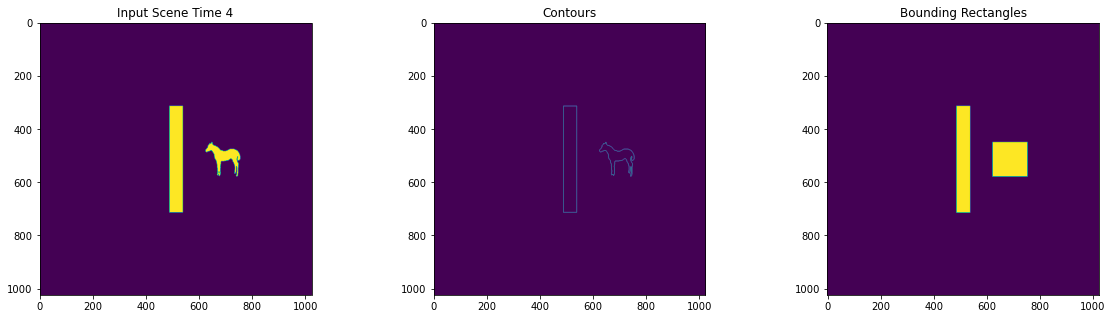

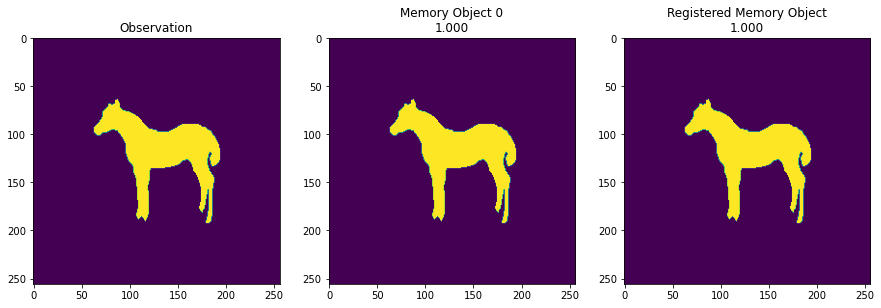

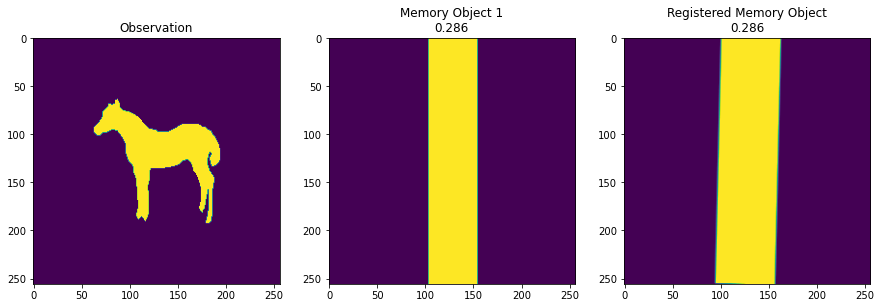

Best Score:   1.0


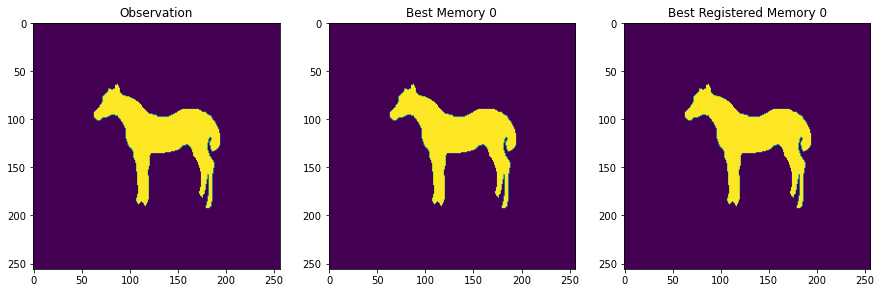



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.007






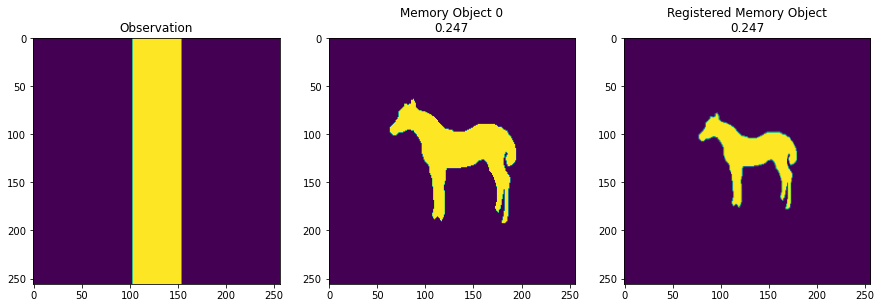

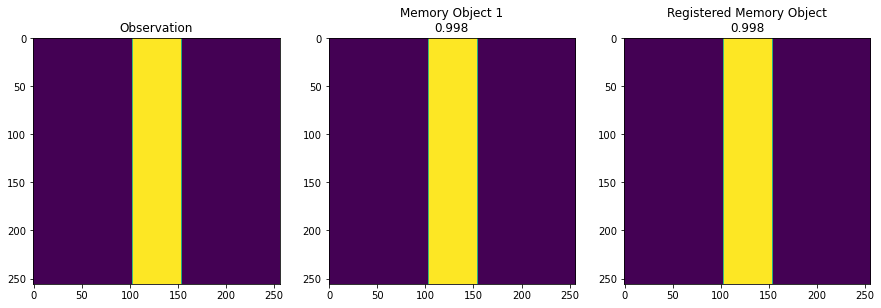

Best Score:   0.998044956517216


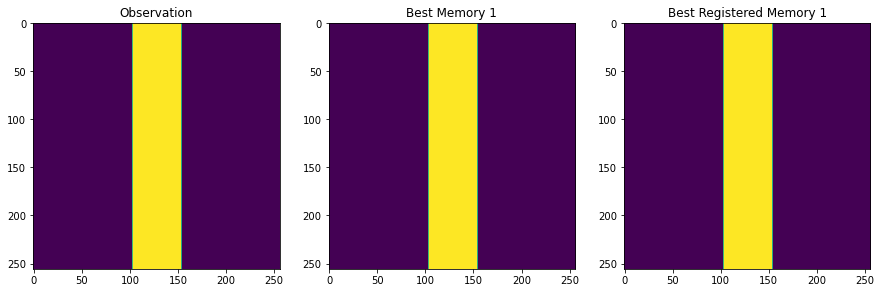



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   1.075






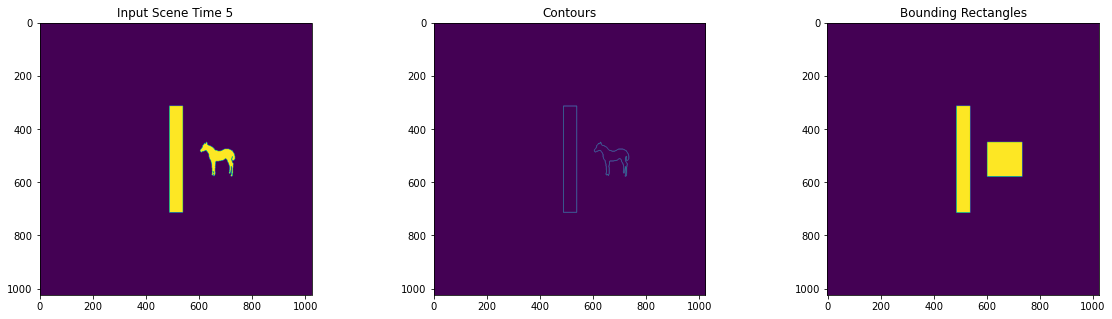

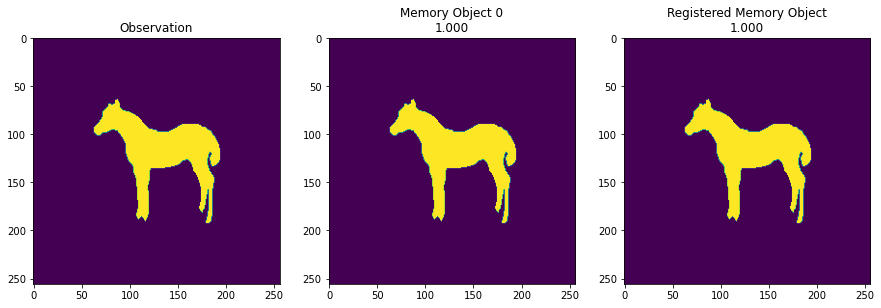

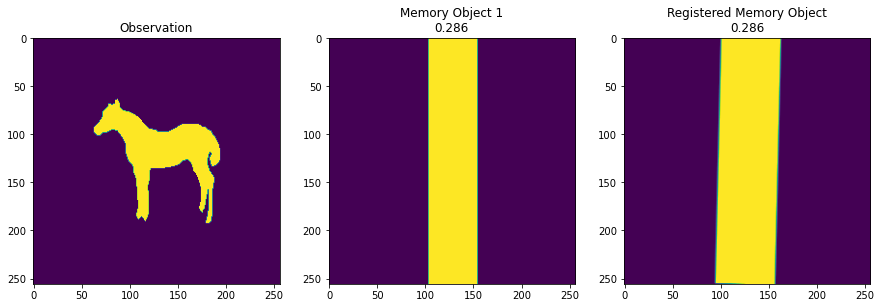

Best Score:   1.0


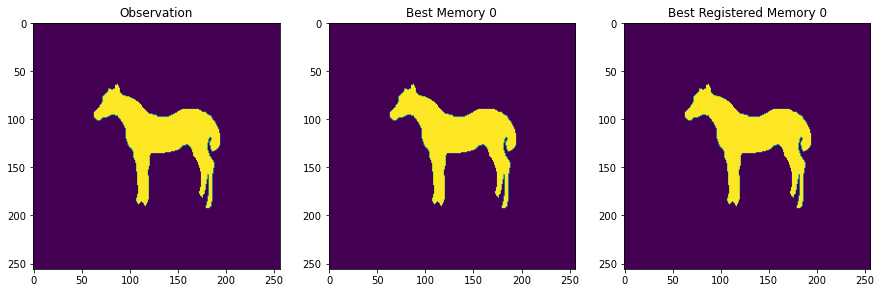



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.060






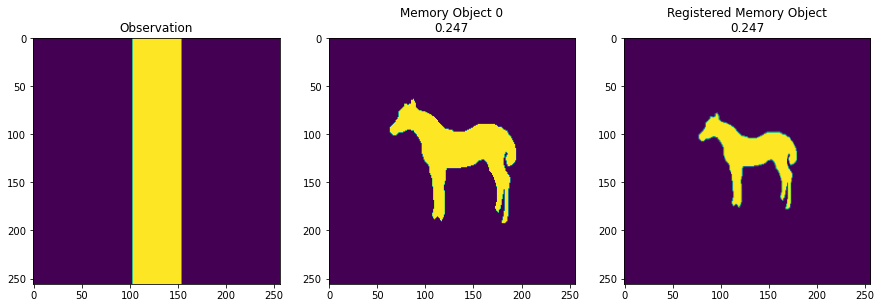

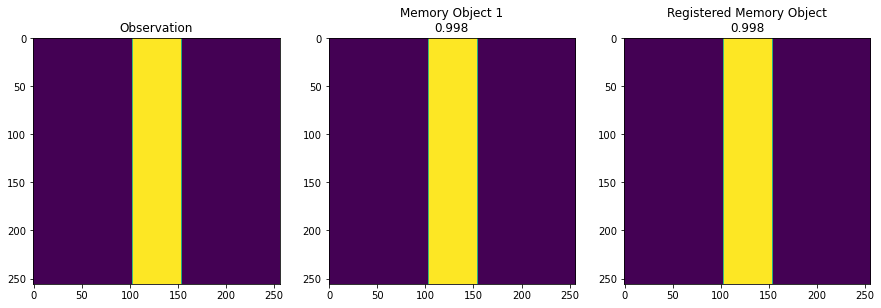

Best Score:   0.998044956517216


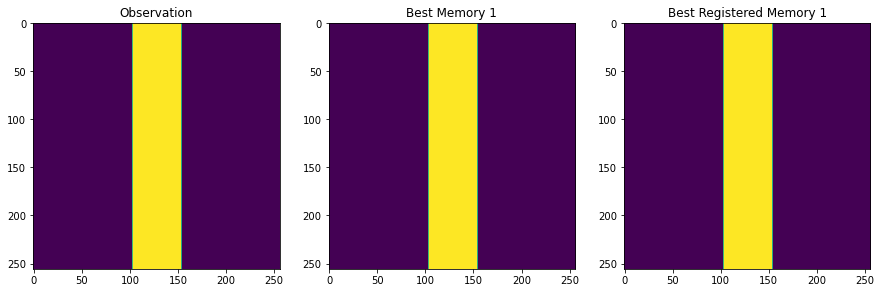



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   1.050






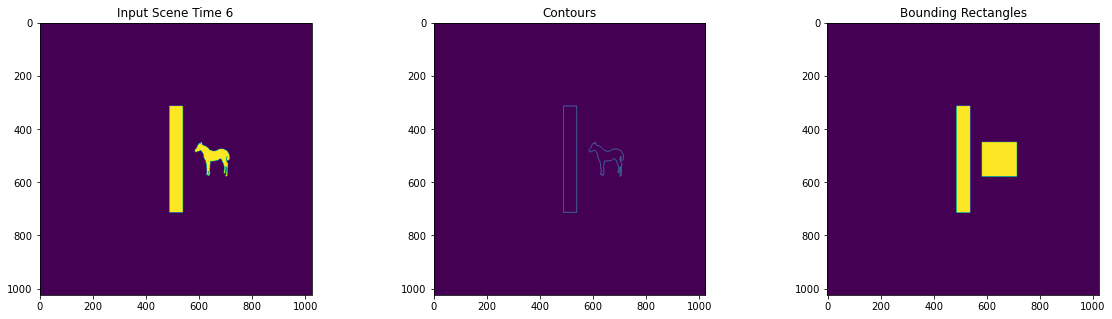

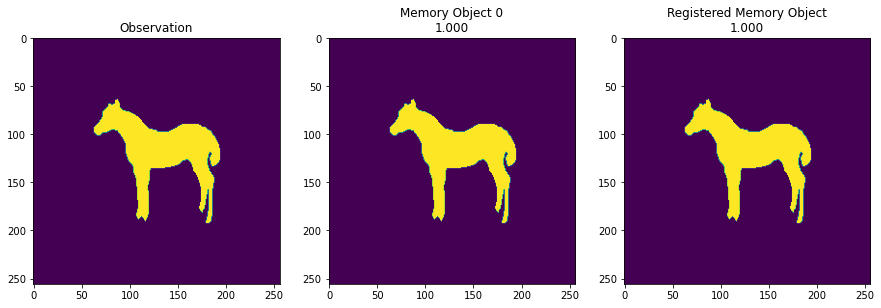

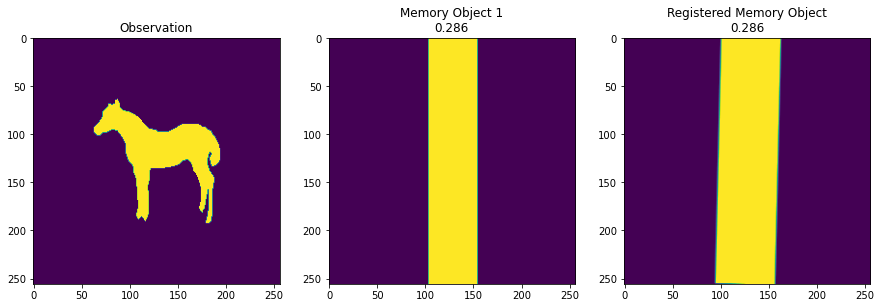

Best Score:   1.0


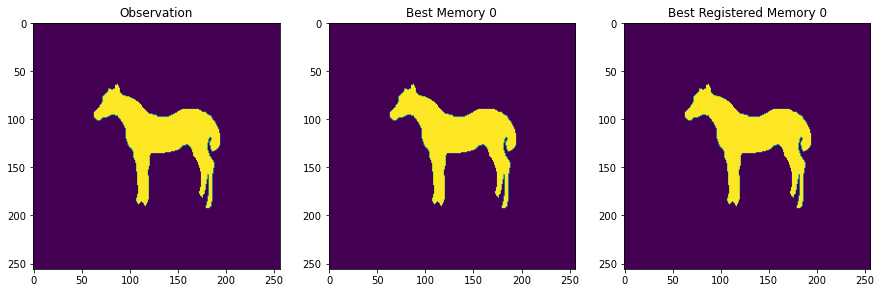



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.060






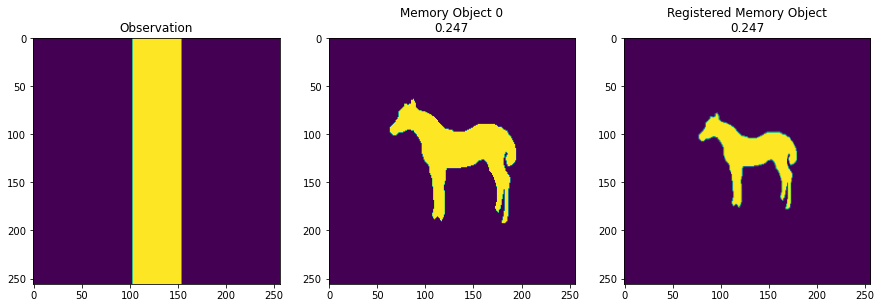

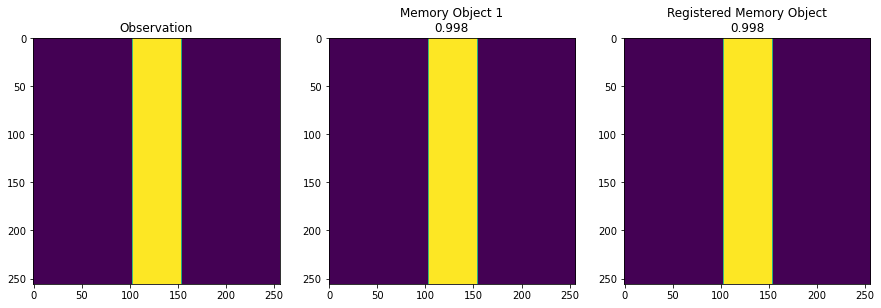

Best Score:   0.998044956517216


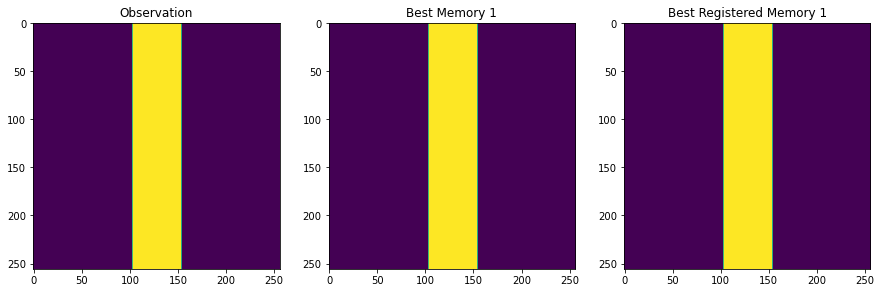



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   0.952






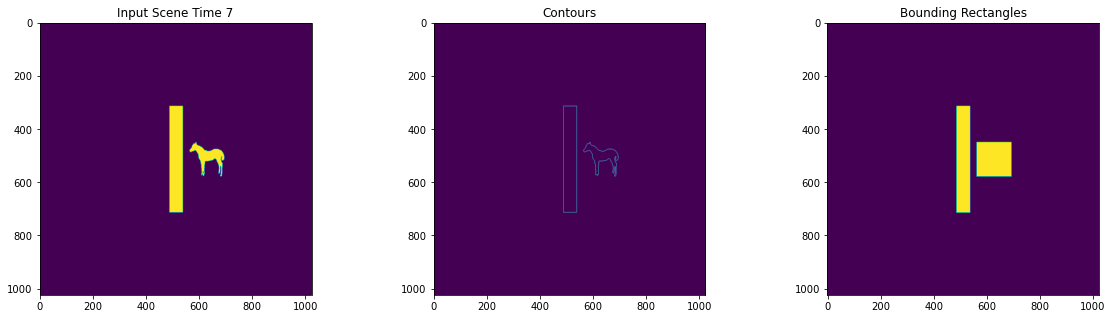

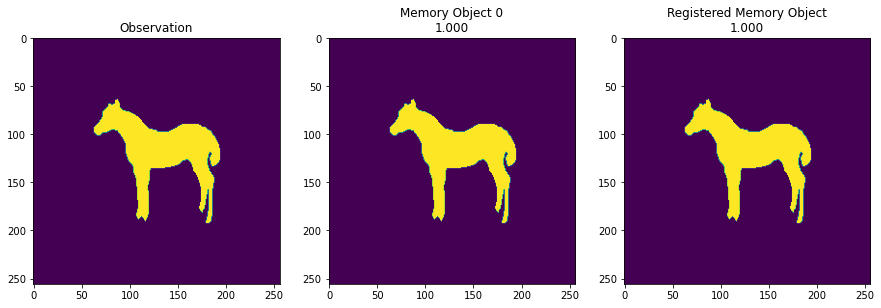

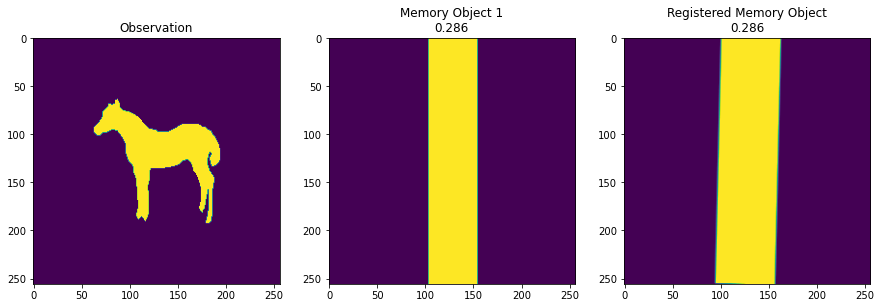

Best Score:   1.0


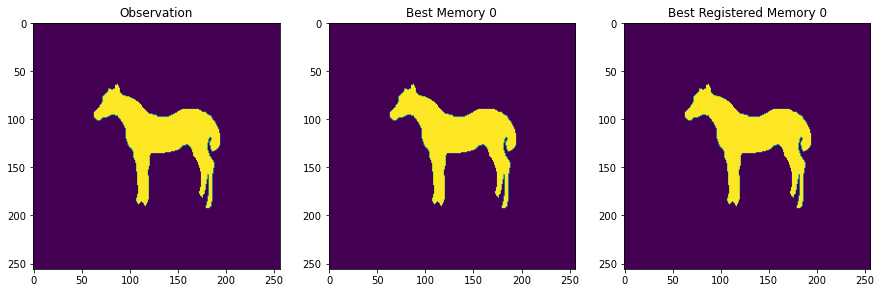



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.288






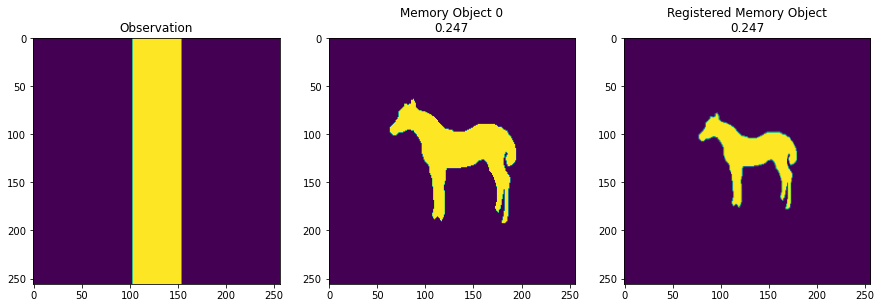

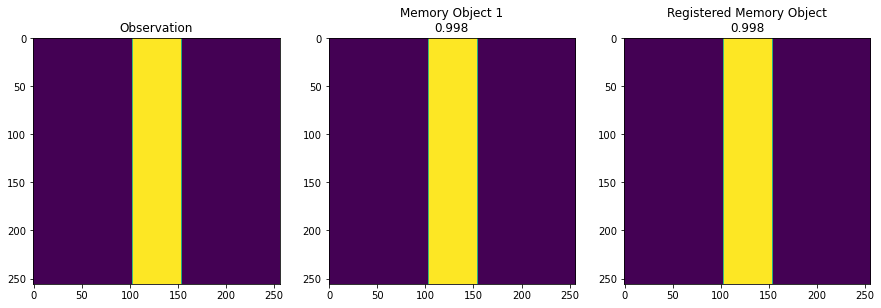

Best Score:   0.998044956517216


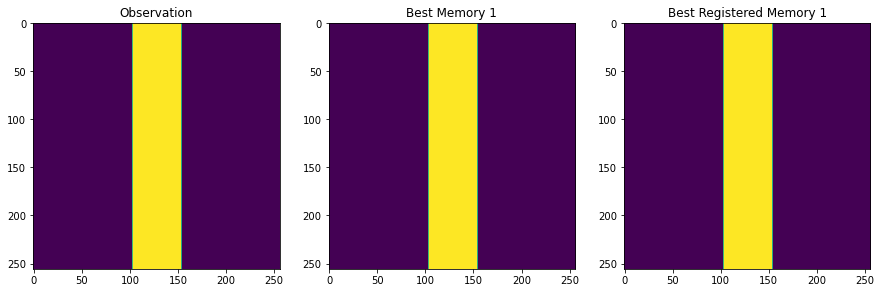



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   0.947






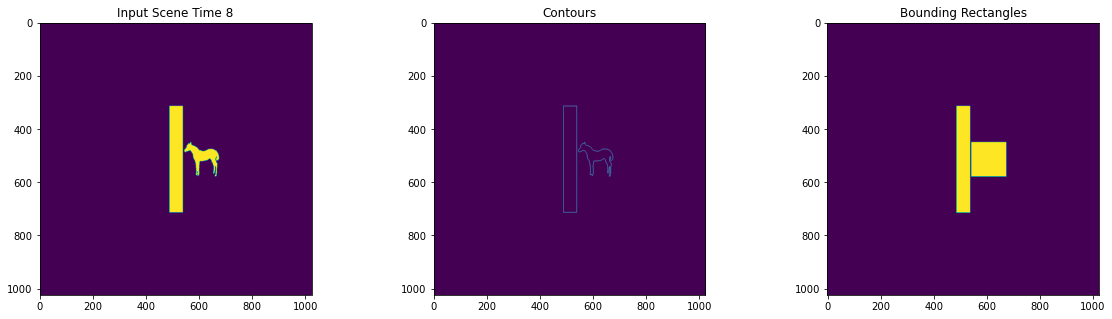

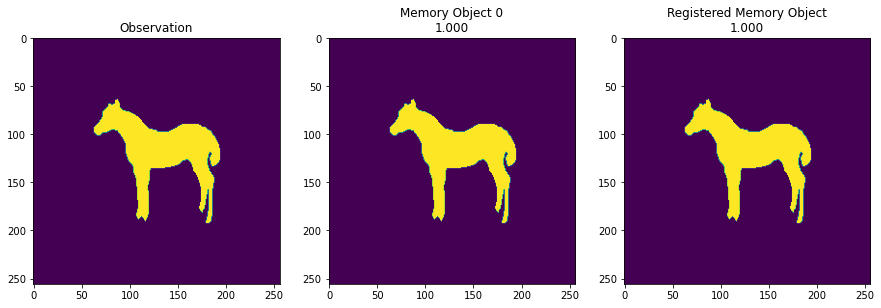

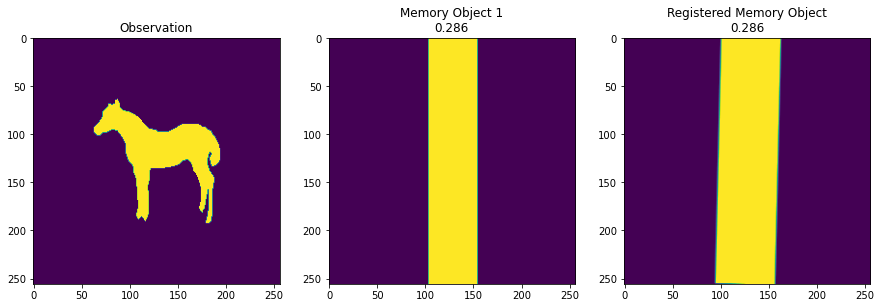

Best Score:   1.0


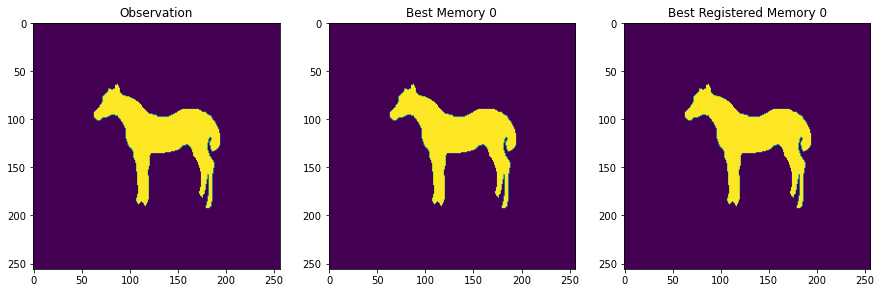



Size of Memory   2     Updating Memory 1.000                   Elapsed time:   1.023






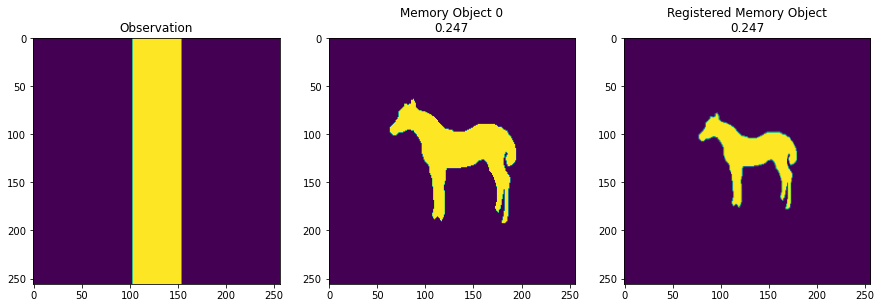

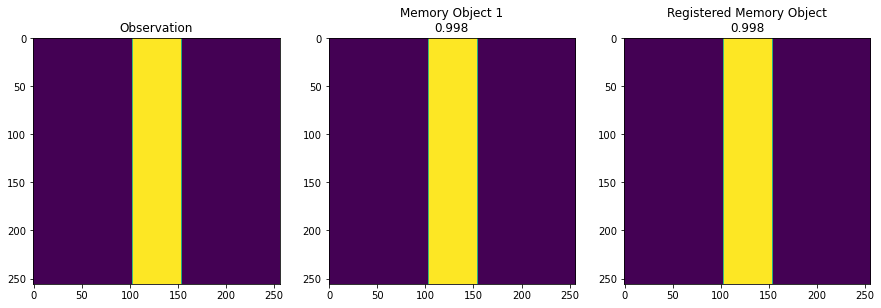

Best Score:   0.998044956517216


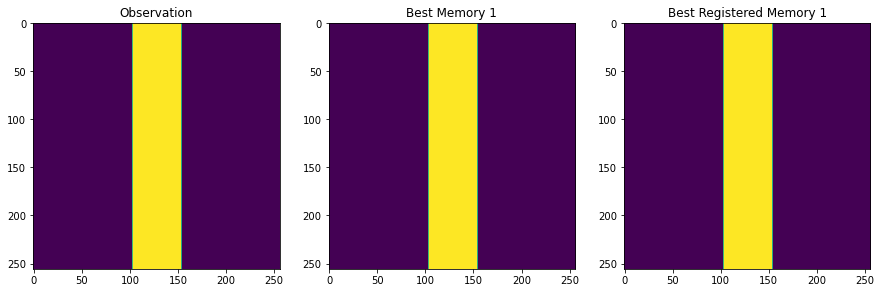



Size of Memory   2     Updating Memory 0.998                   Elapsed time:   1.072






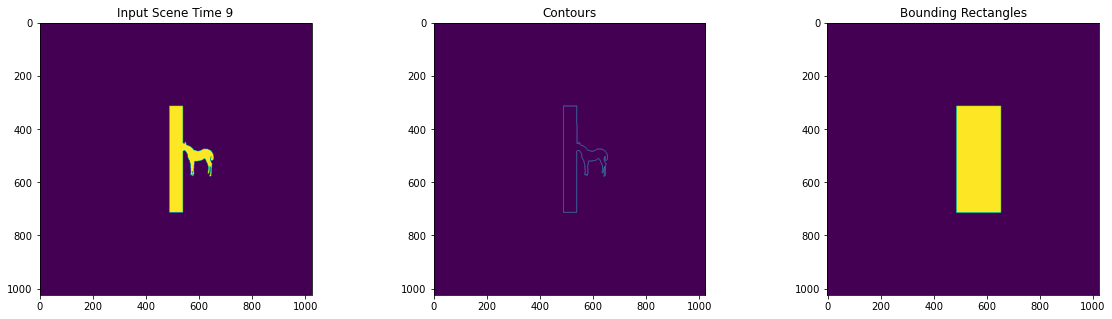

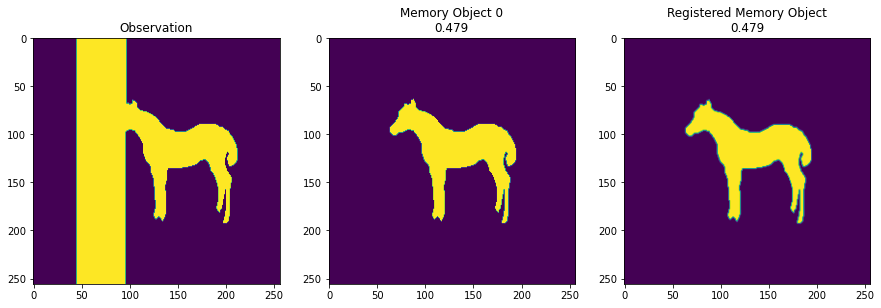

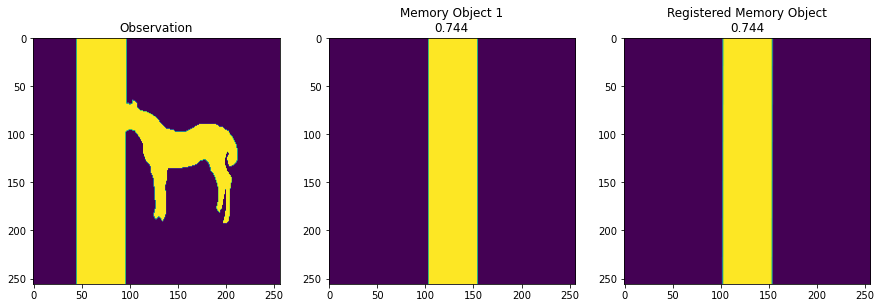

Best Score:   0.7437674701937051


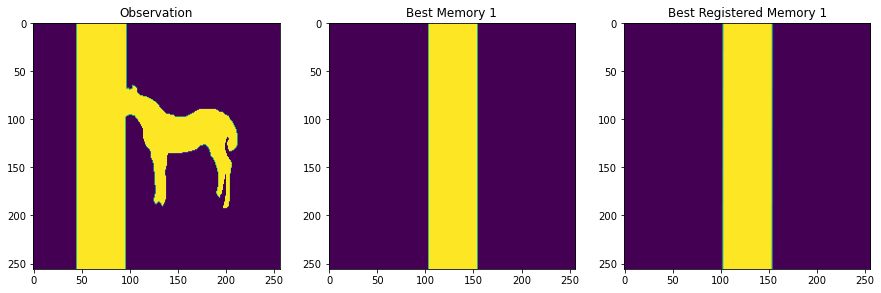



Size of Memory   3     Learning New Object 0.744               Elapsed time:   1.061






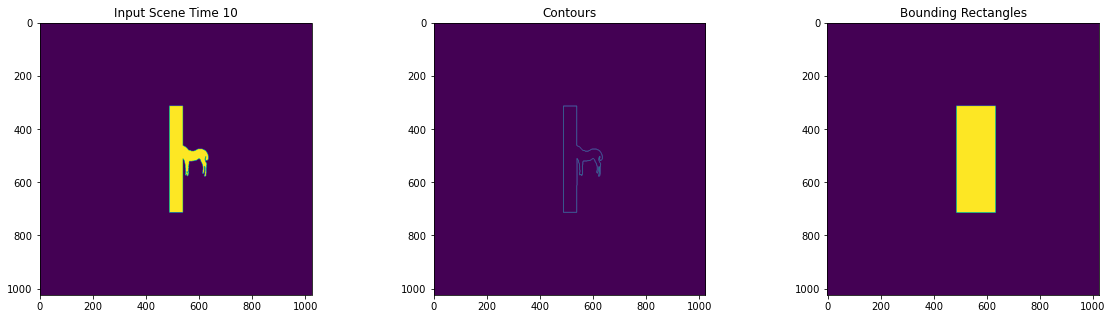

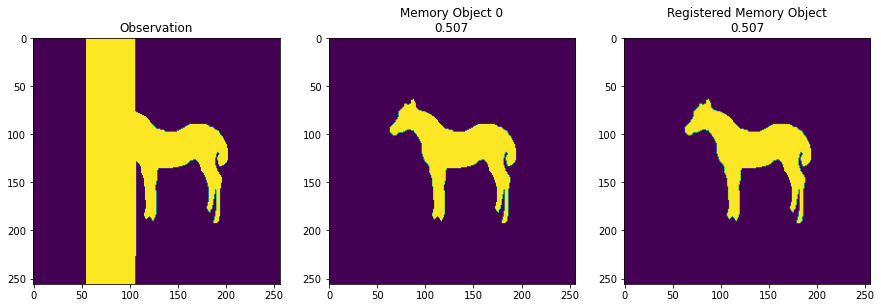

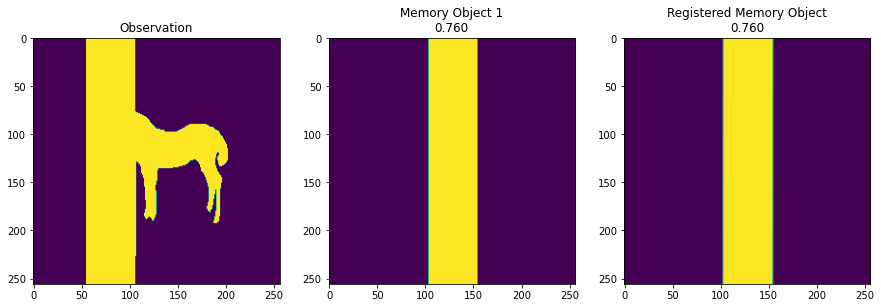

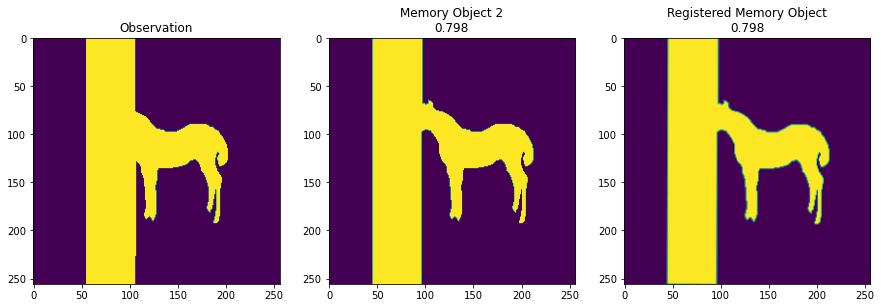

Best Score:   0.7979386844460102


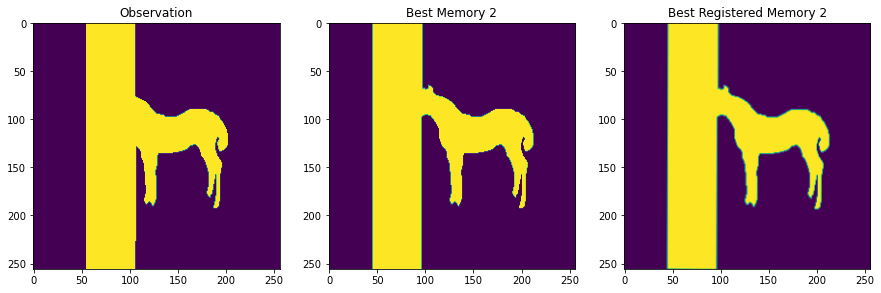



Size of Memory   4     Learning New Object 0.798               Elapsed time:   1.497






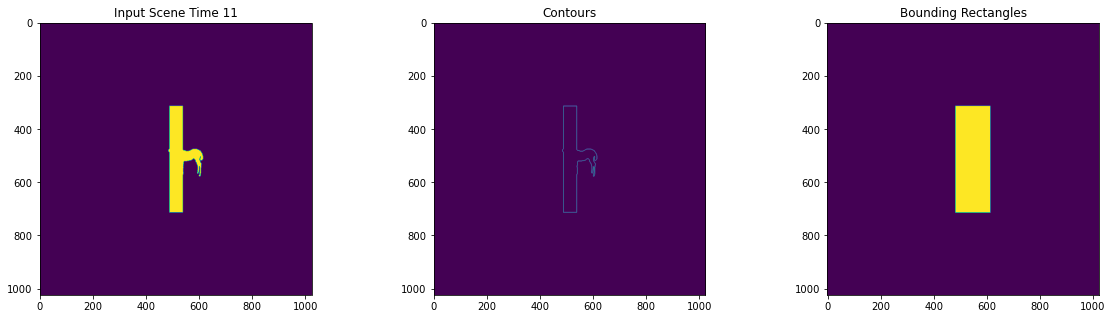

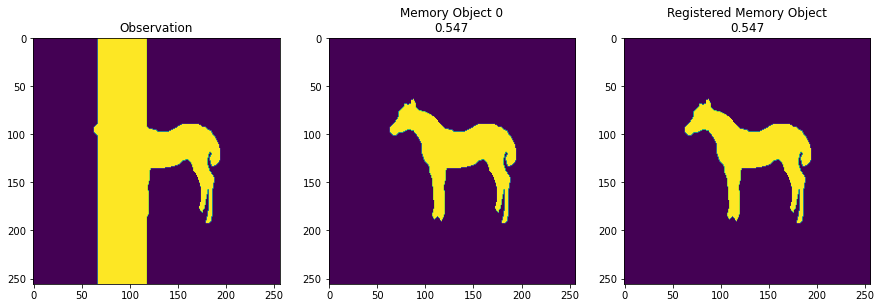

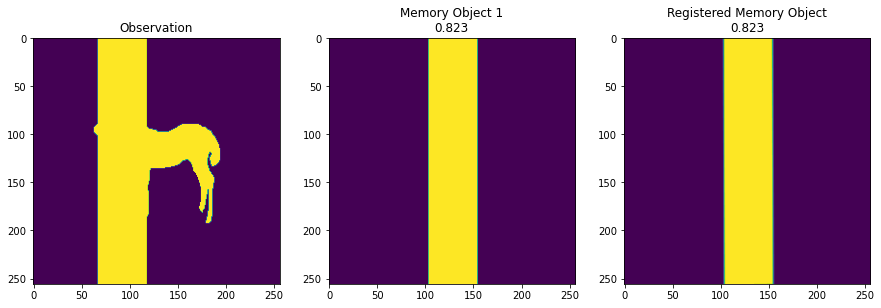

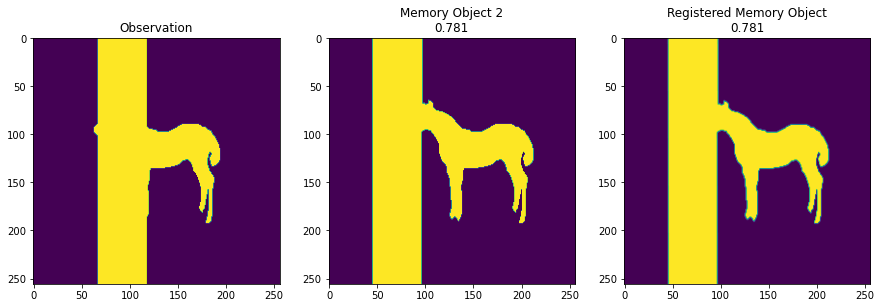

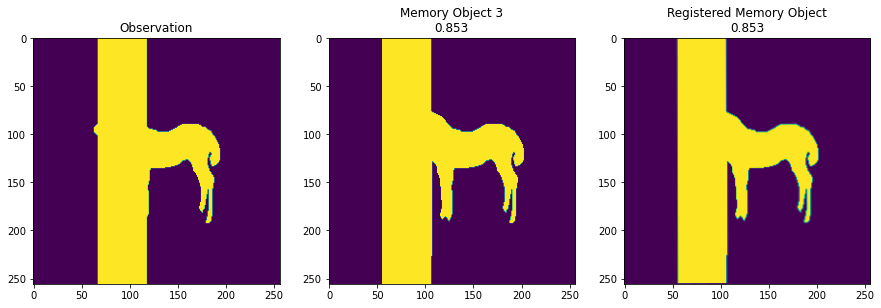

Best Score:   0.852641204074326


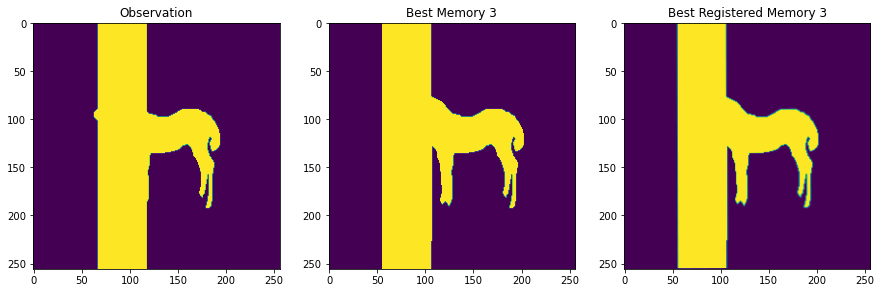



Size of Memory   5     Learning New Object 0.853               Elapsed time:   1.973






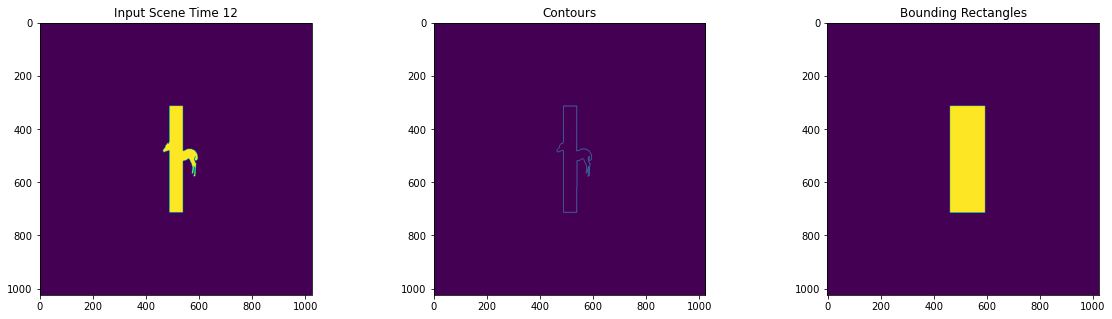

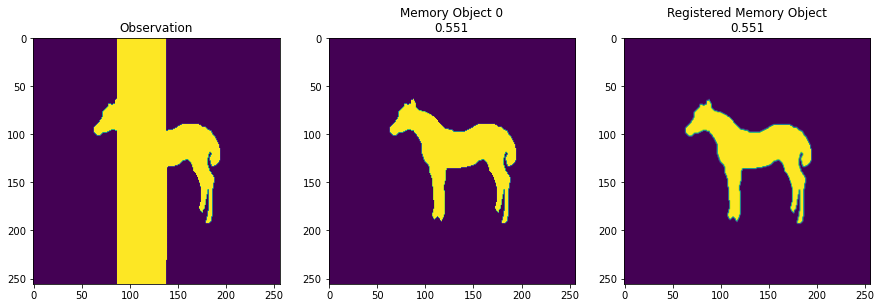

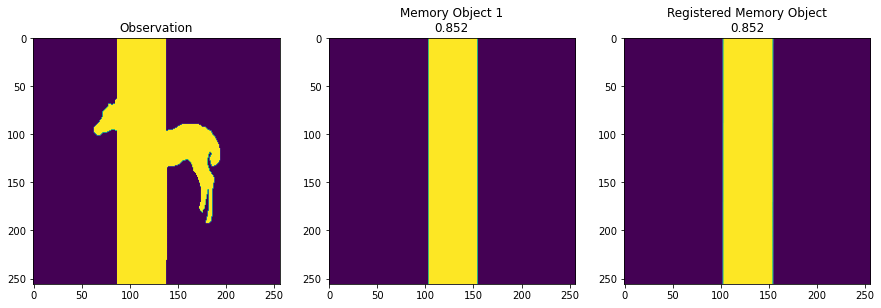

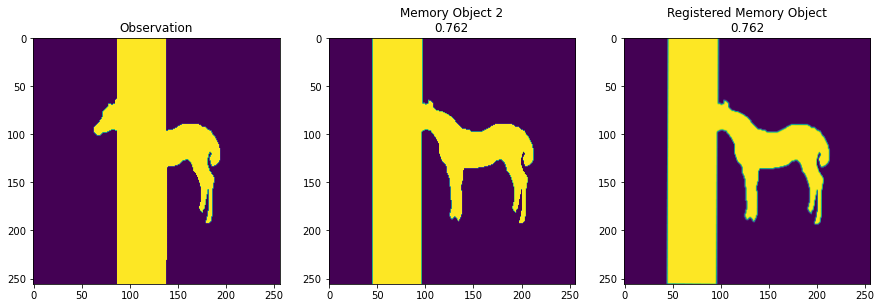

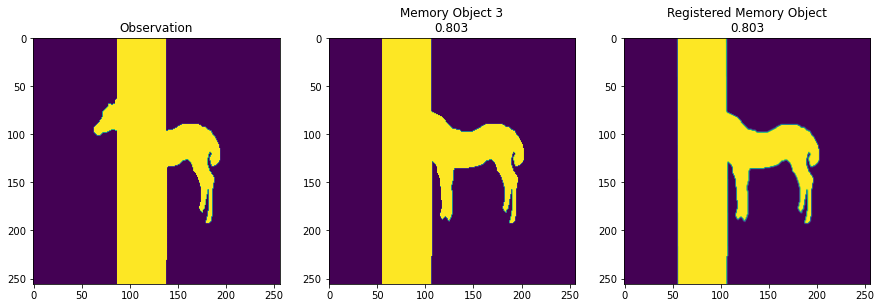

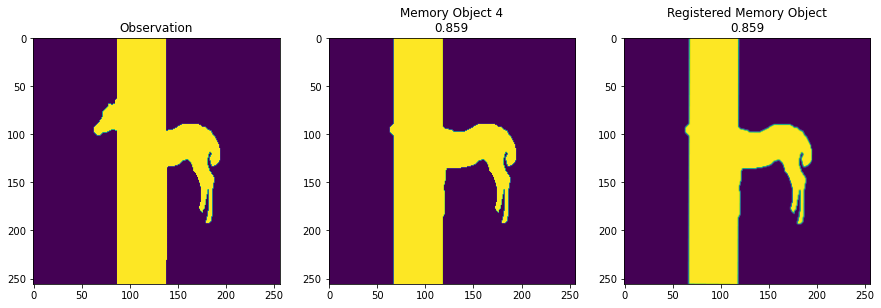

Best Score:   0.8589793785062326


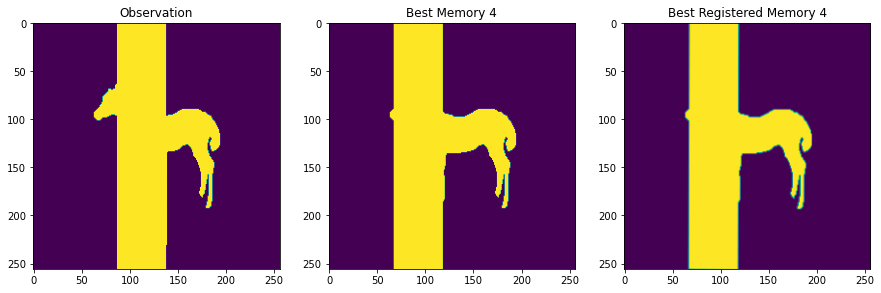



Size of Memory   6     Learning New Object 0.859               Elapsed time:   2.508






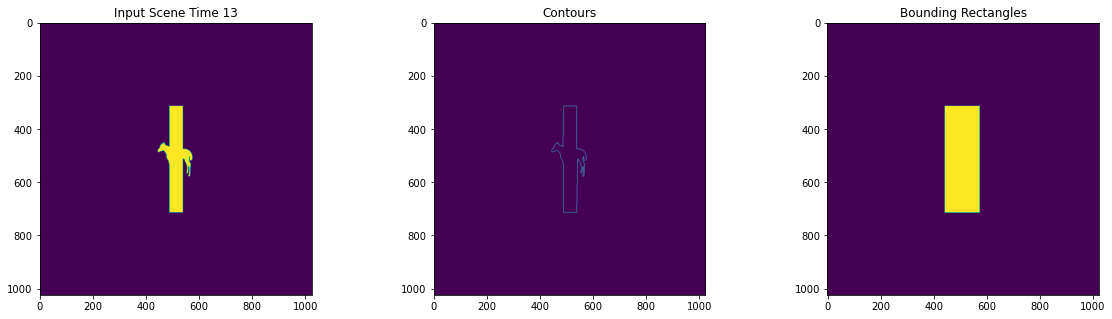

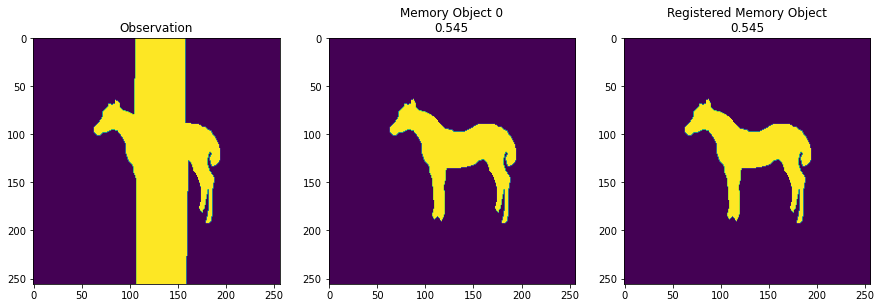

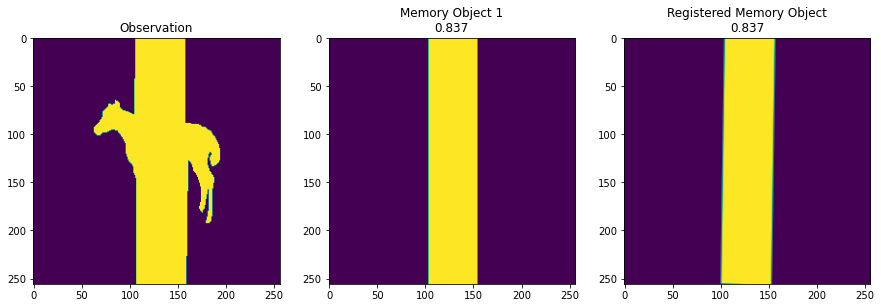

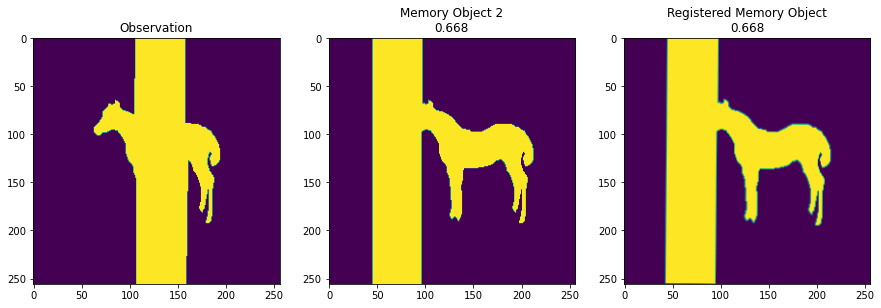

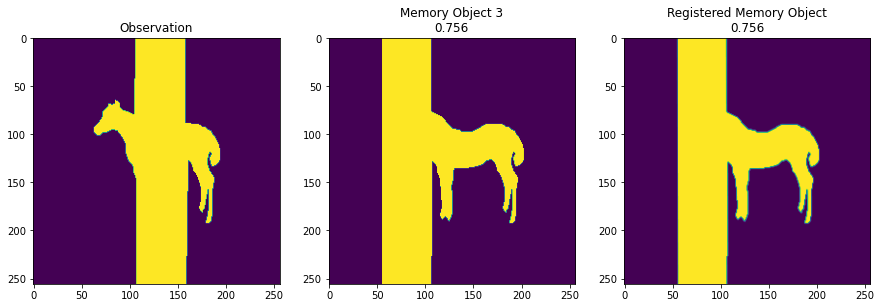

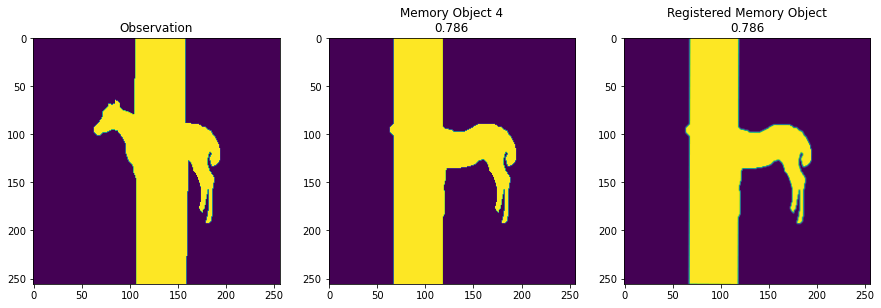

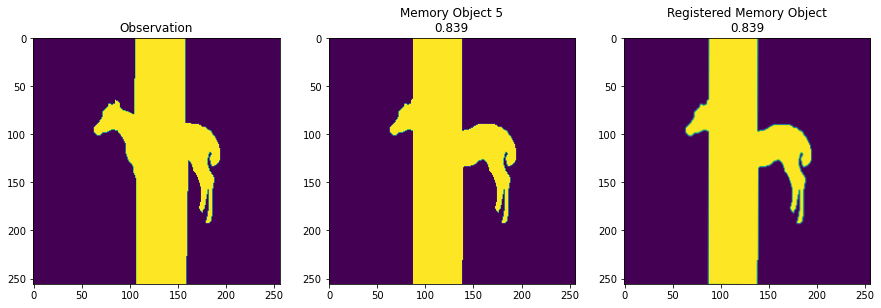

Best Score:   0.8393018871336457


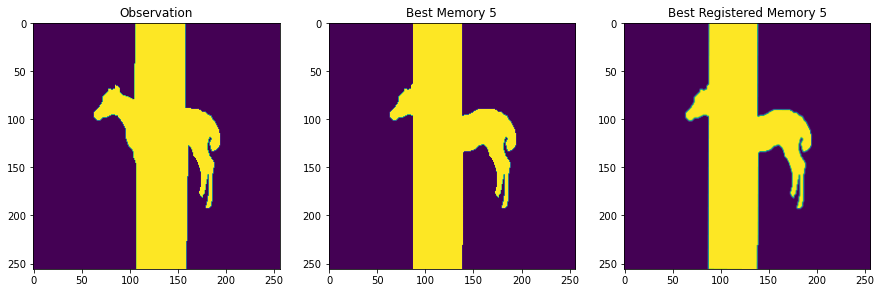



Size of Memory   7     Learning New Object 0.839               Elapsed time:   2.873






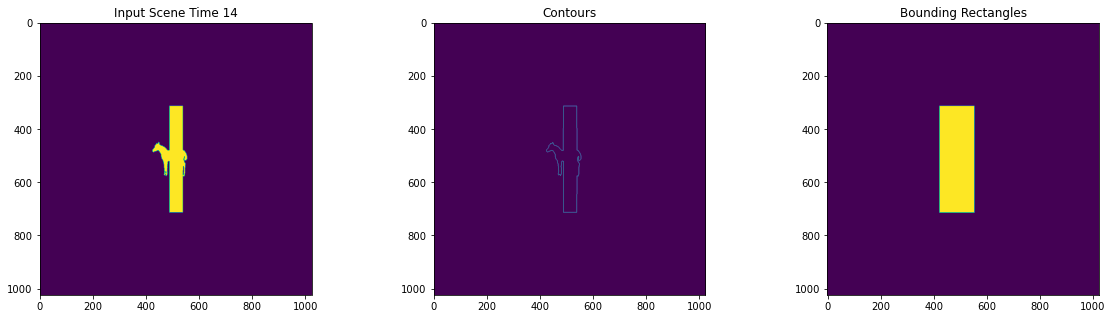

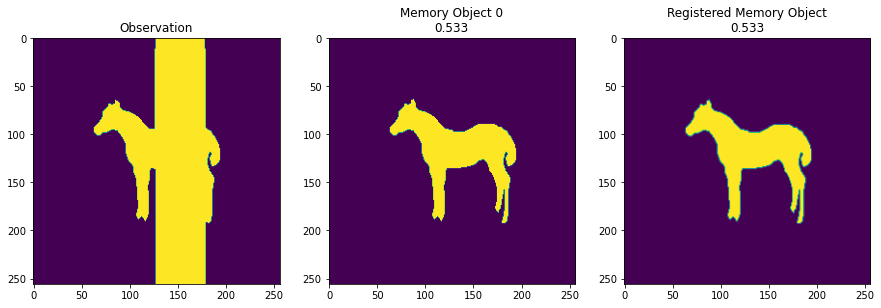

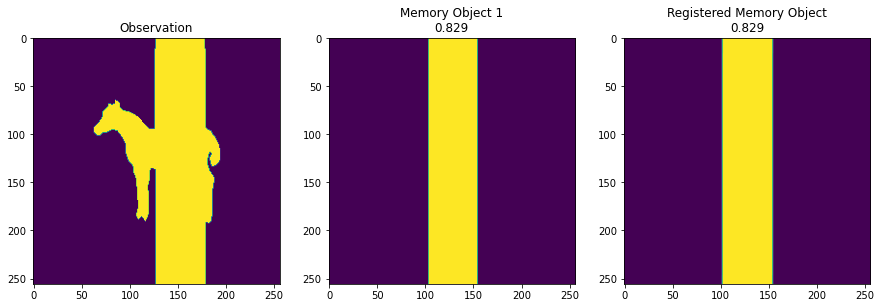

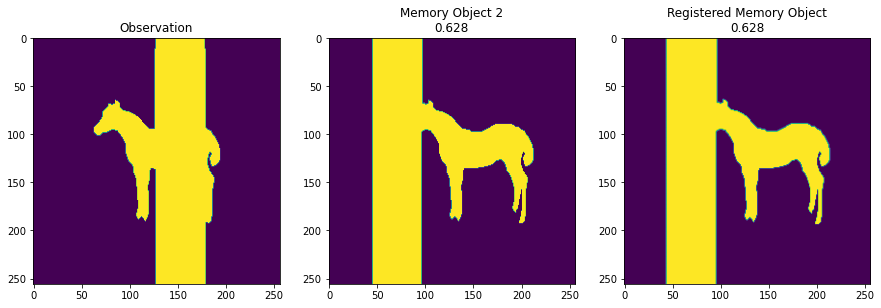

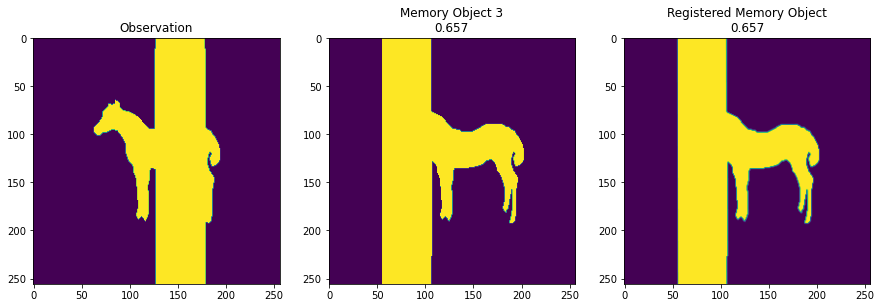

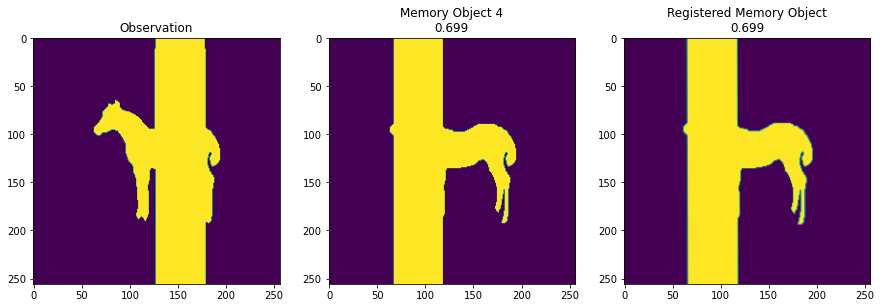

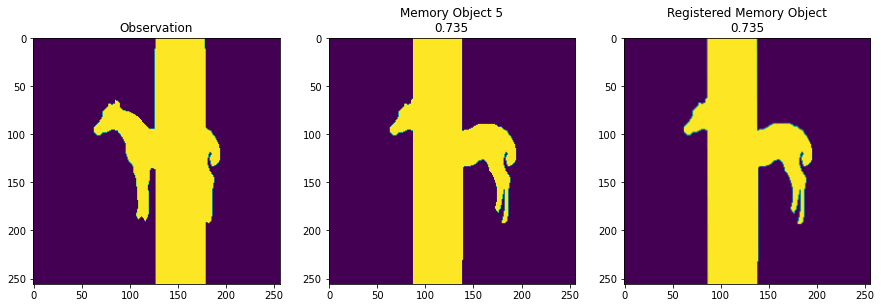

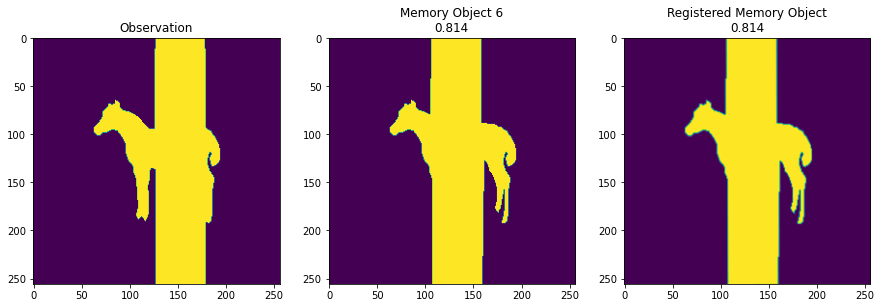

Best Score:   0.8292851738965411


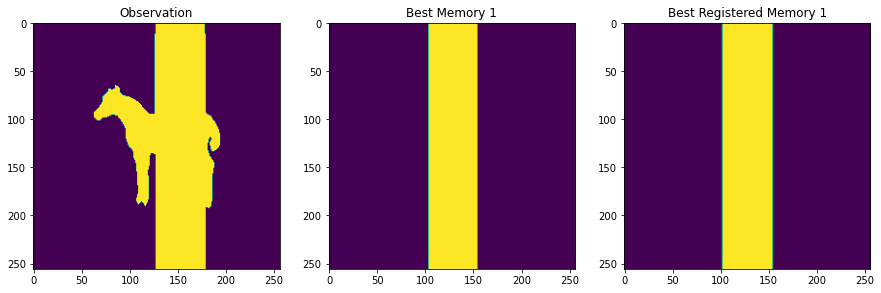



Size of Memory   8     Learning New Object 0.829               Elapsed time:   3.399






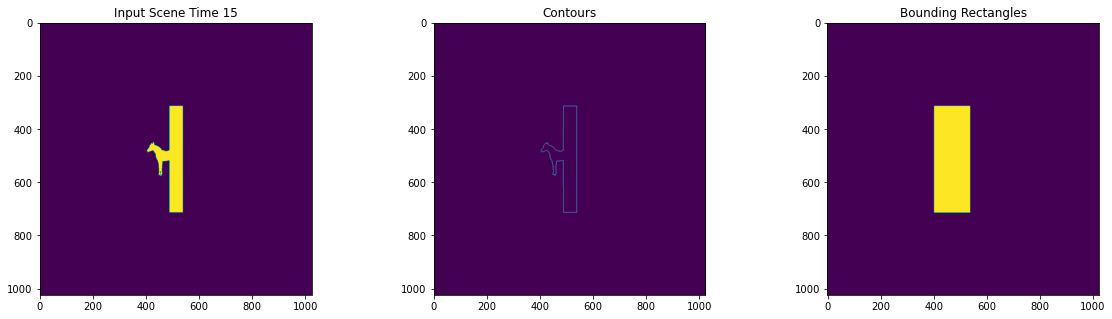

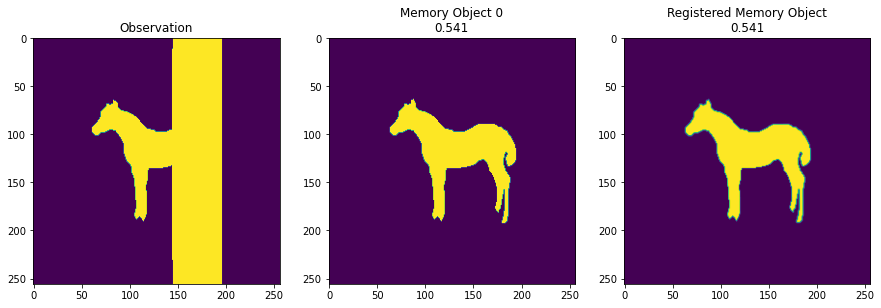

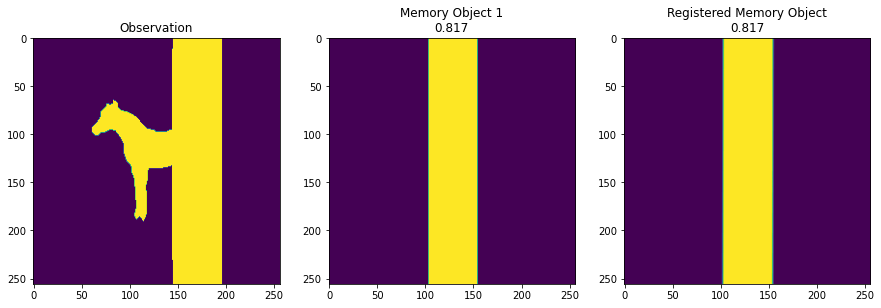

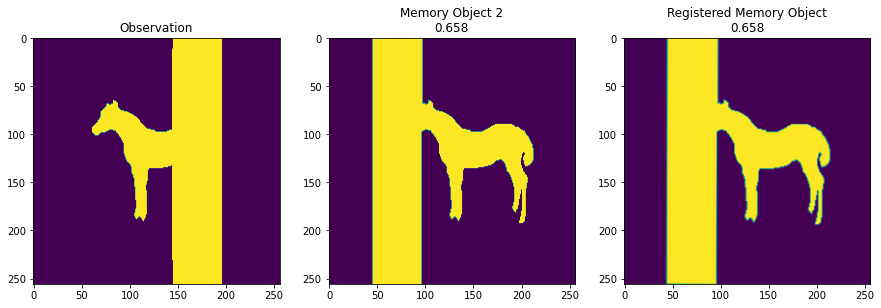

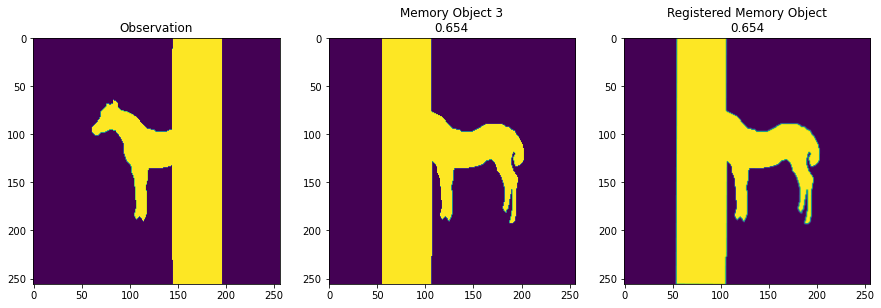

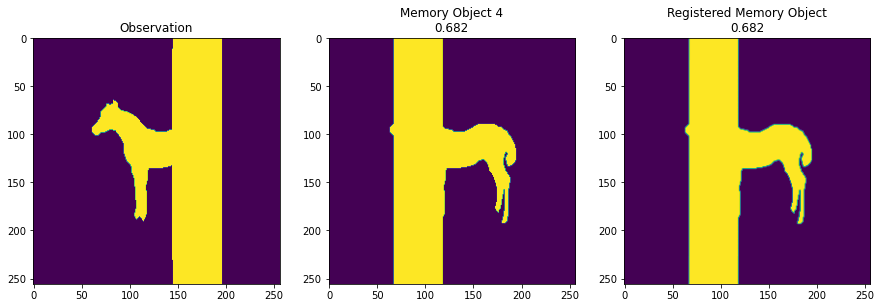

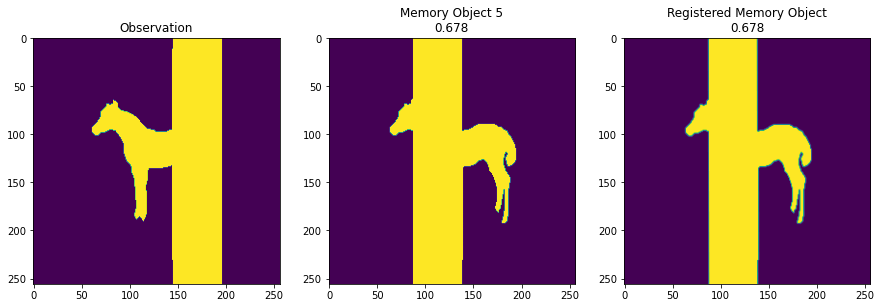

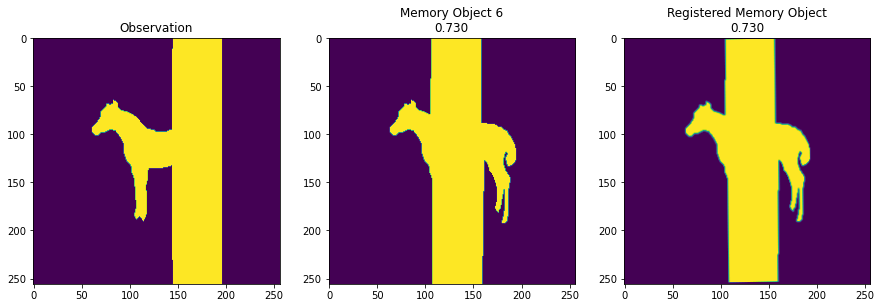

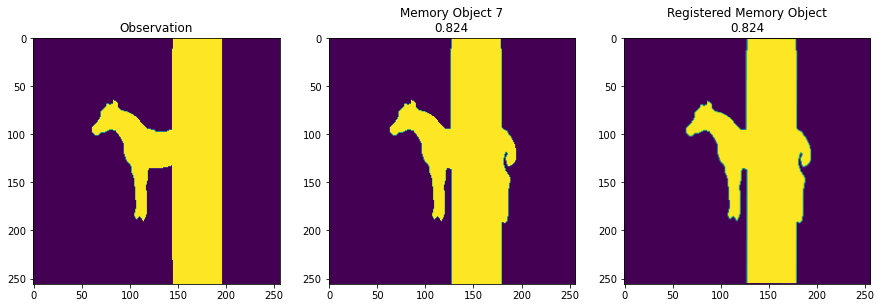

Best Score:   0.8240847079711011


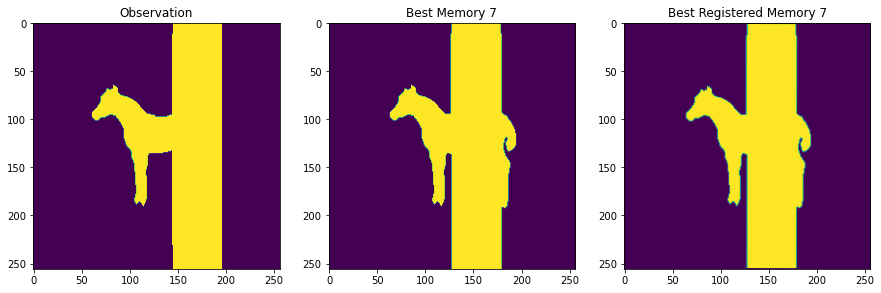



Size of Memory   9     Learning New Object 0.824               Elapsed time:   3.909






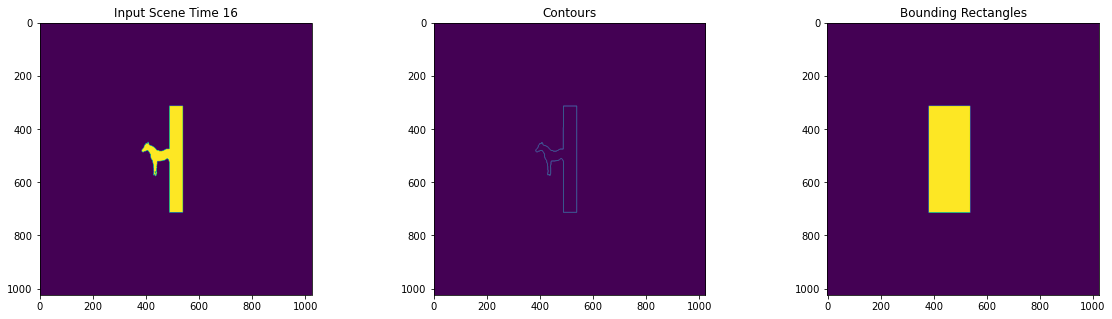

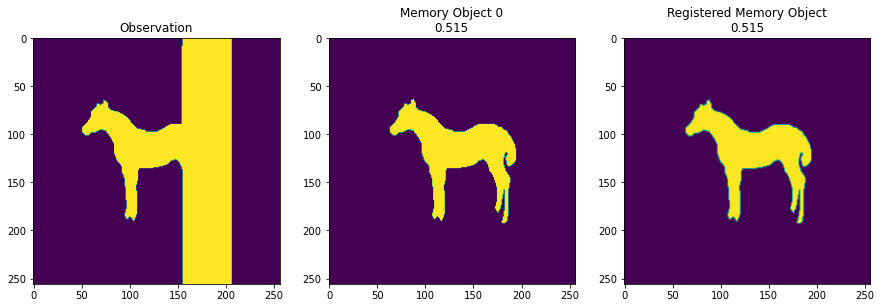

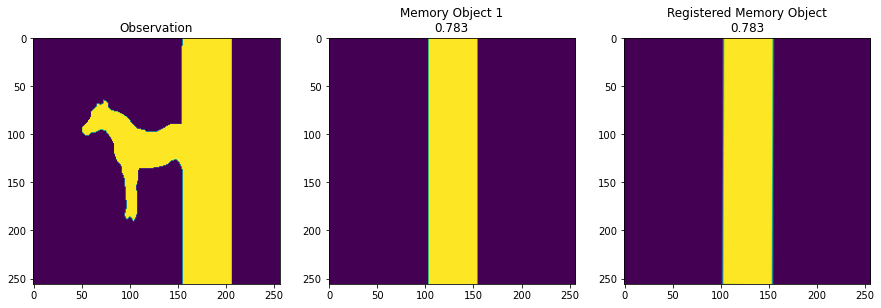

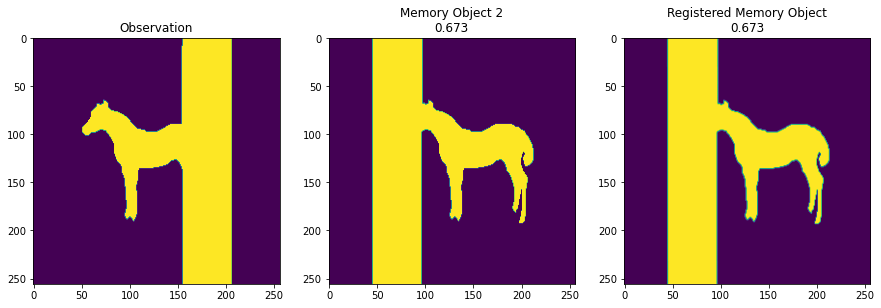

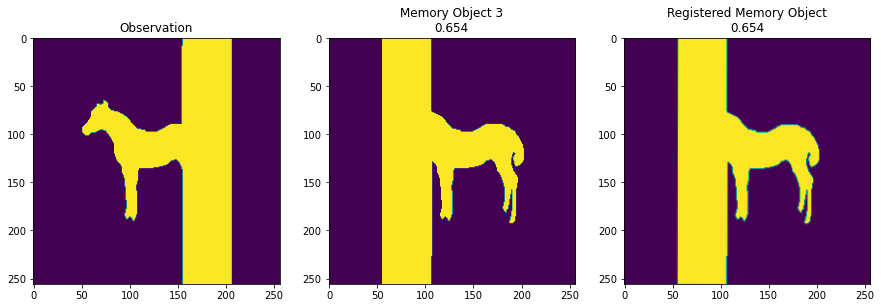

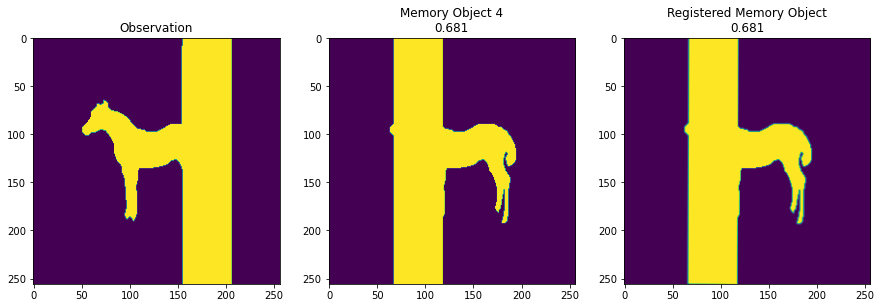

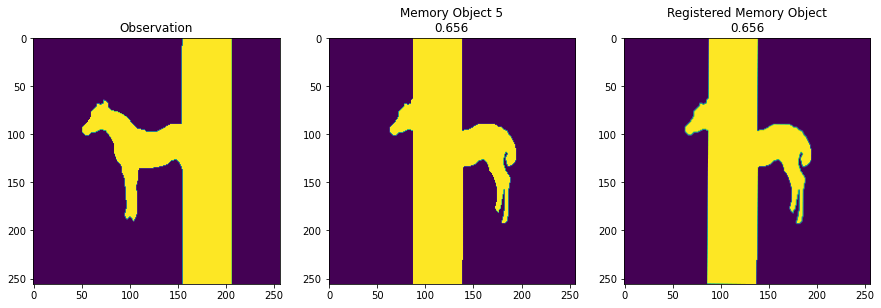

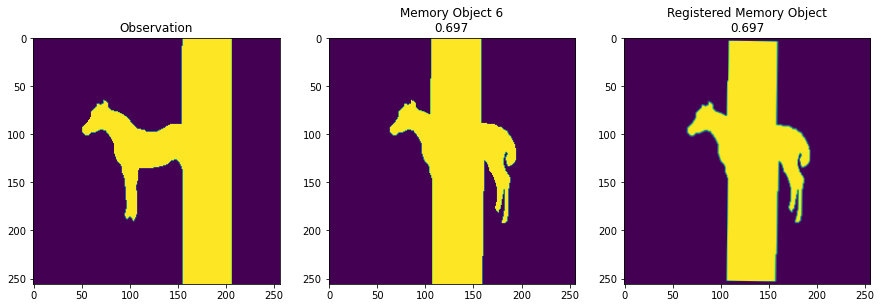

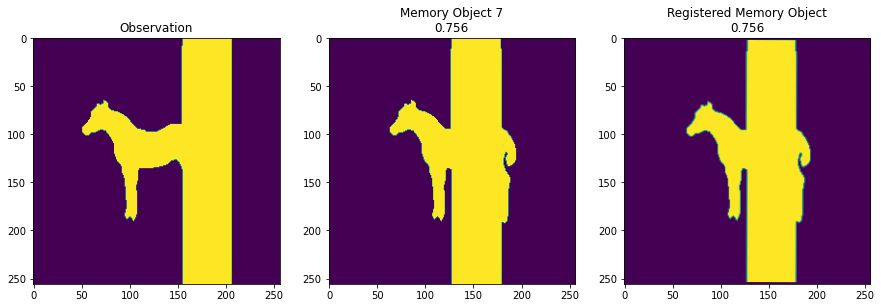

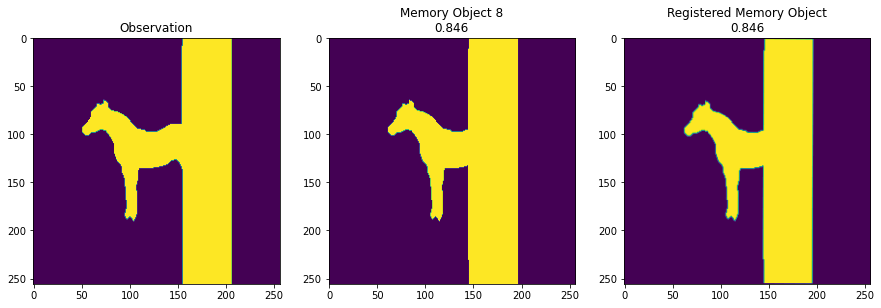

Best Score:   0.8460728039554908


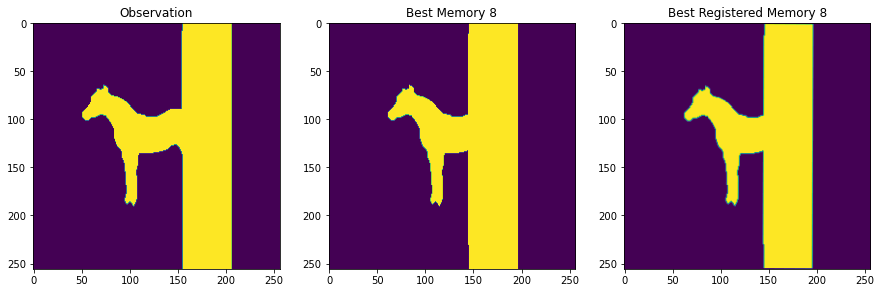



Size of Memory  10     Learning New Object 0.846               Elapsed time:   4.212






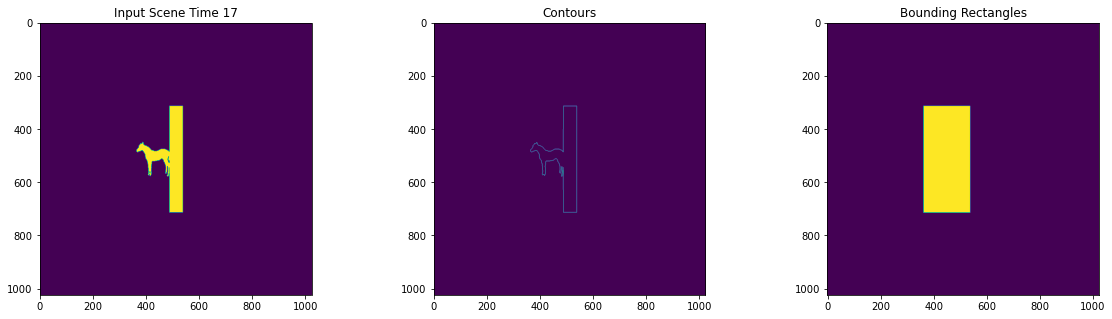

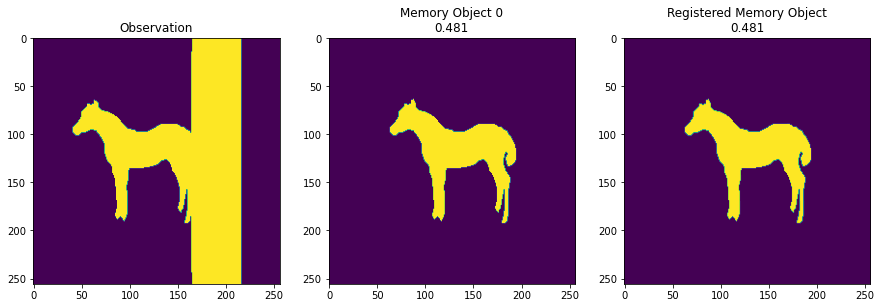

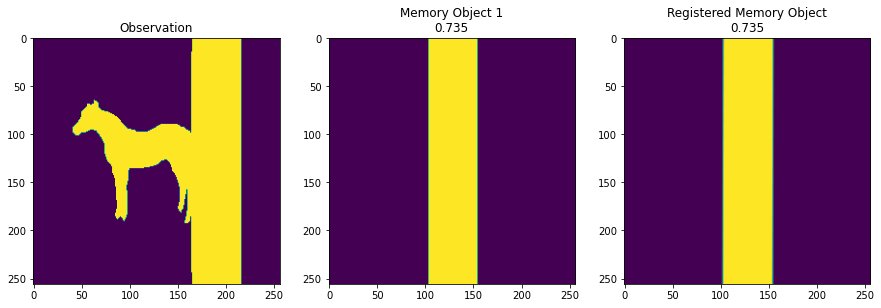

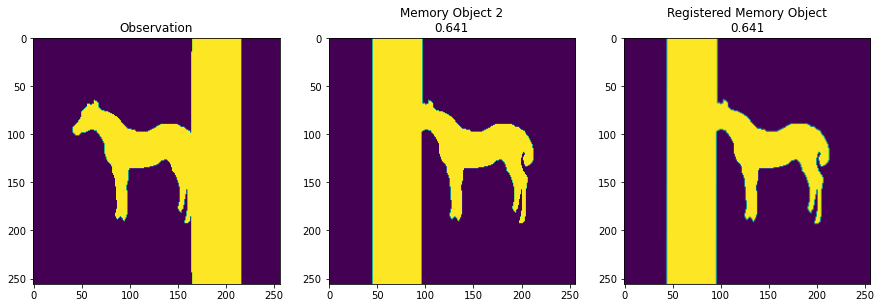

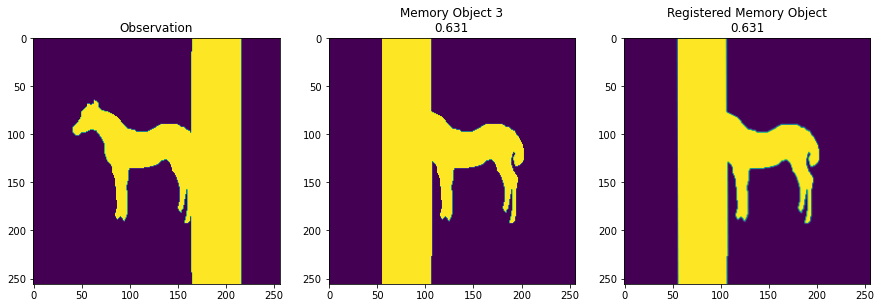

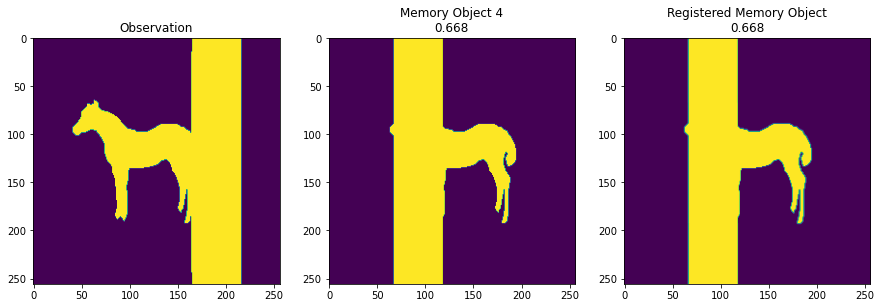

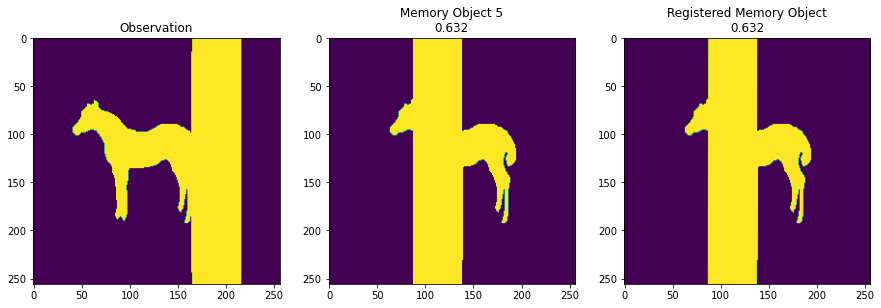

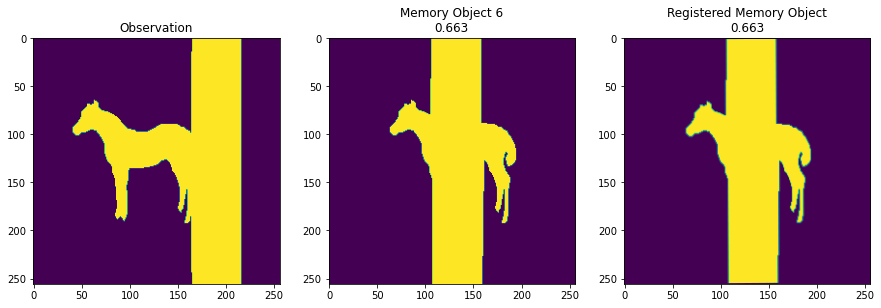

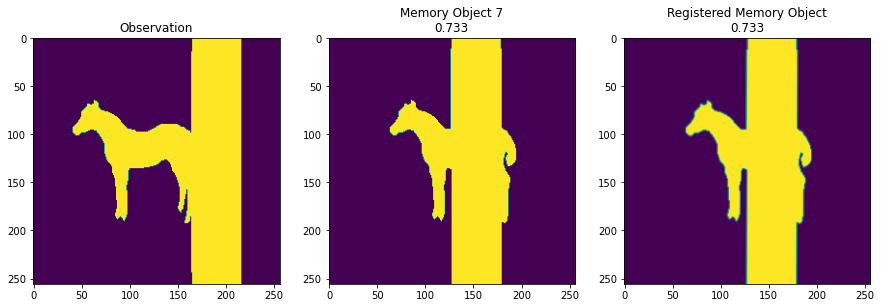

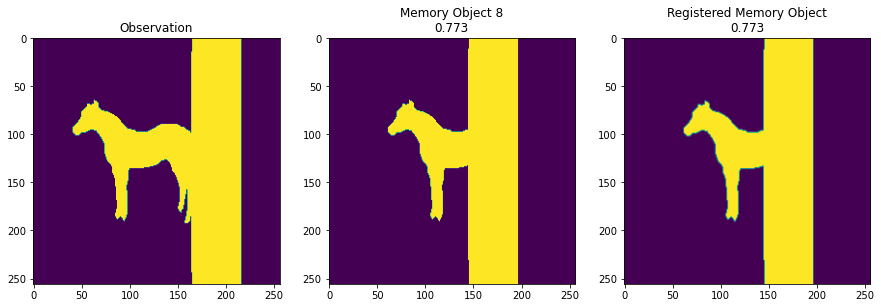

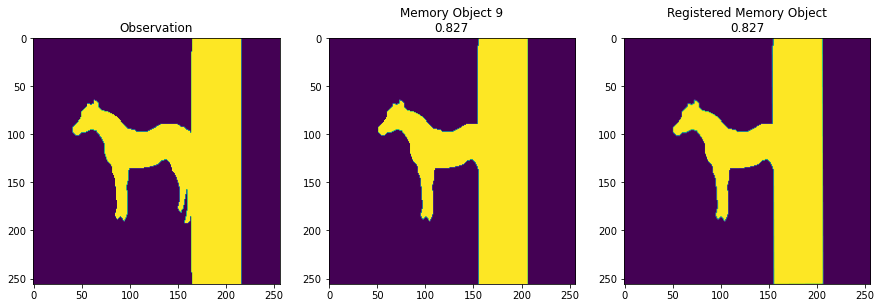

Best Score:   0.826627621942363


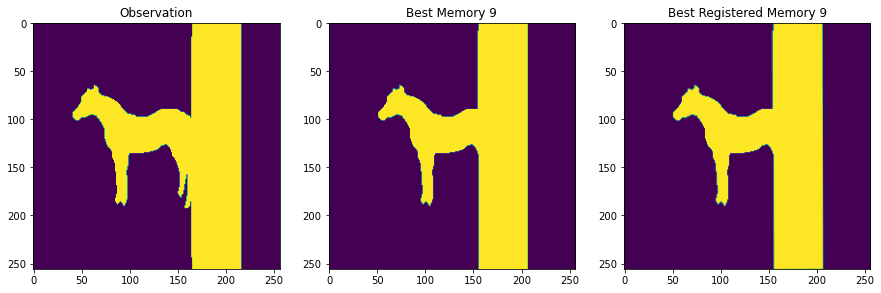



Size of Memory  11     Learning New Object 0.827               Elapsed time:   4.667






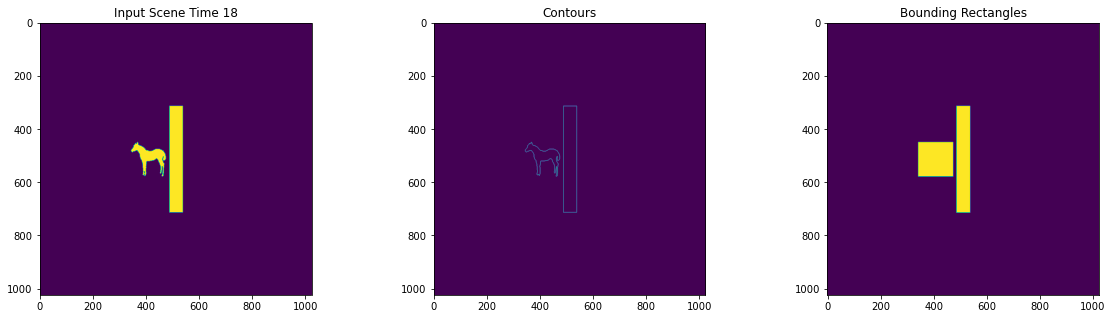

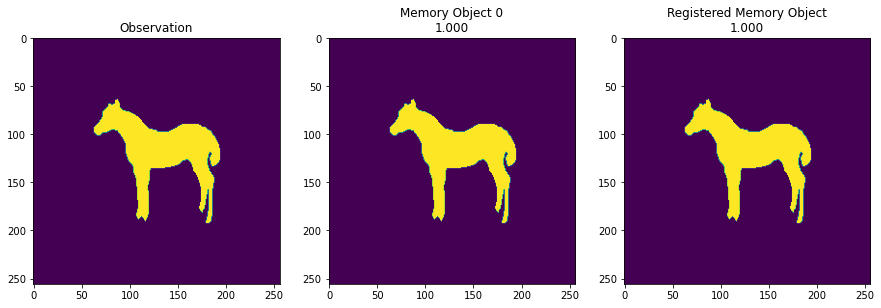

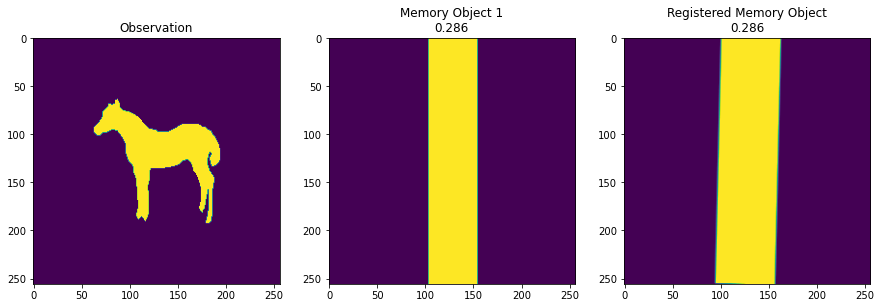

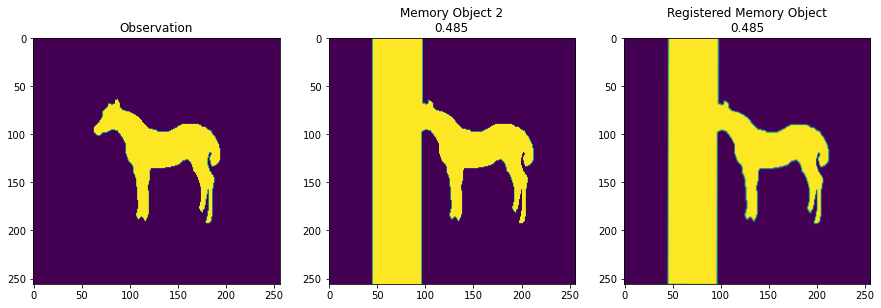

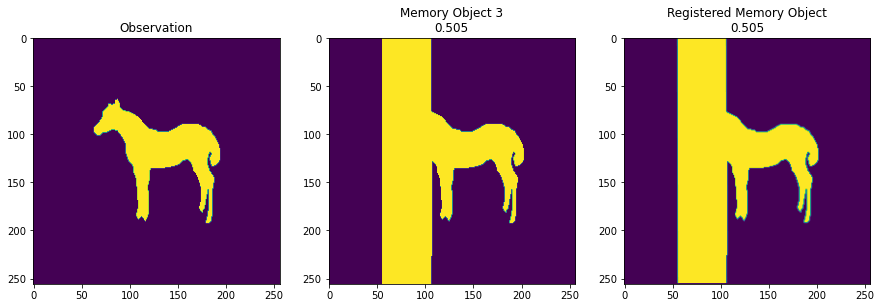

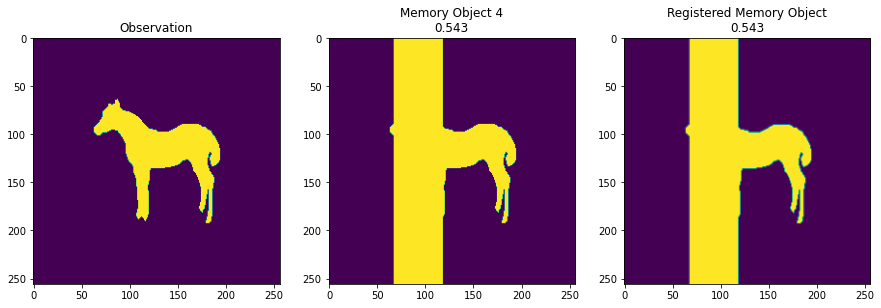

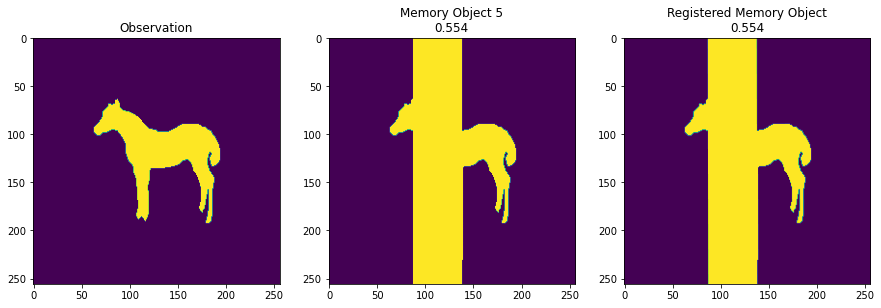

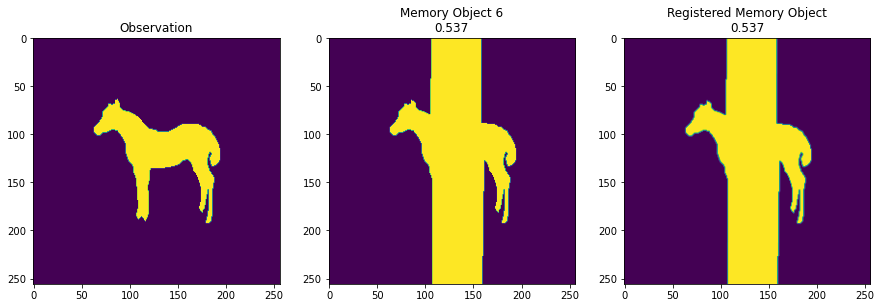

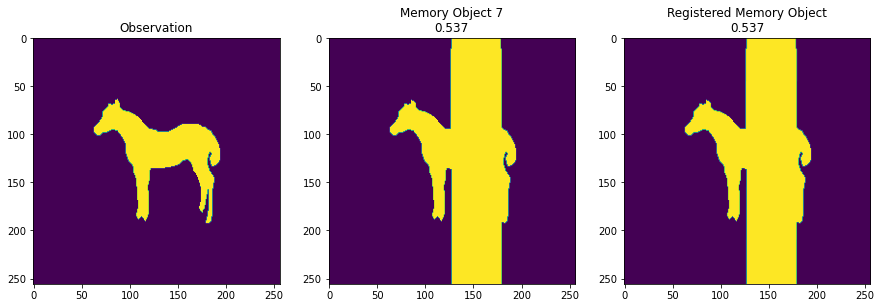

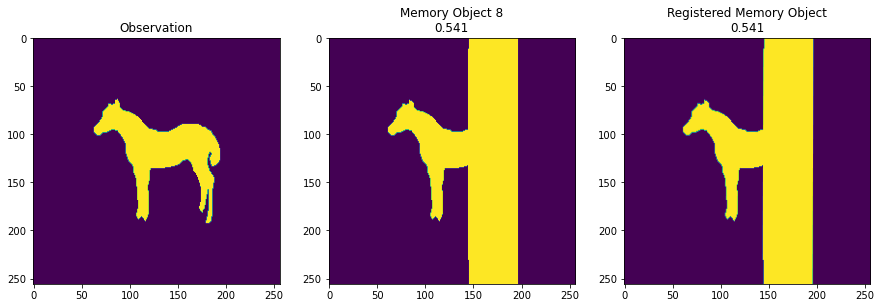

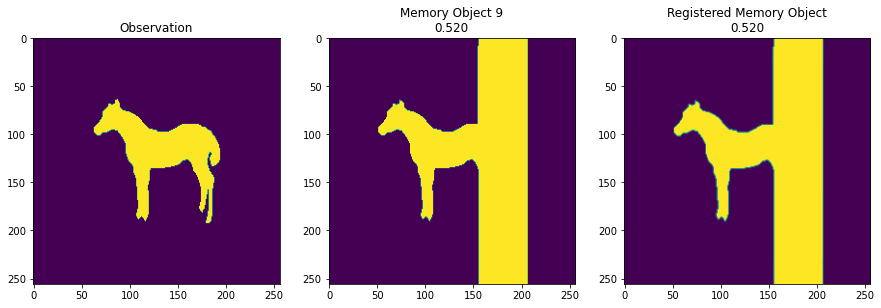

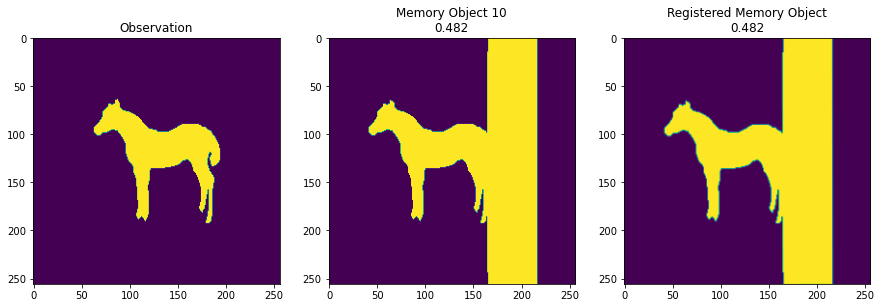

Best Score:   1.0


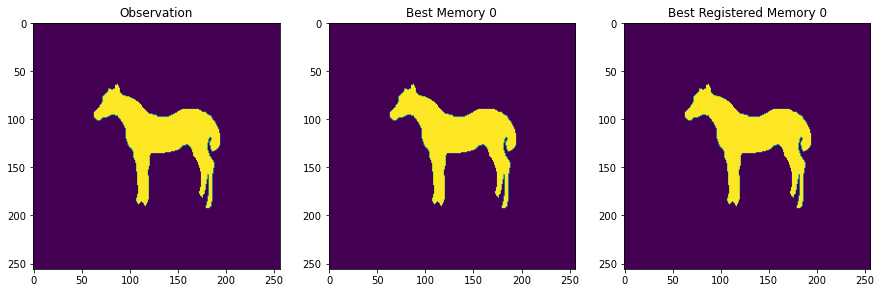



Size of Memory  11     Updating Memory 1.000                   Elapsed time:   5.041






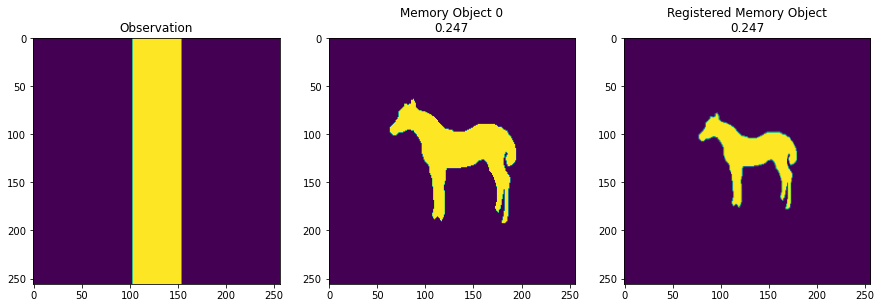

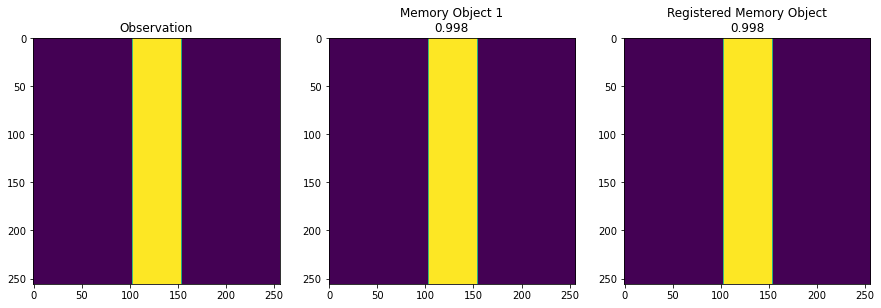

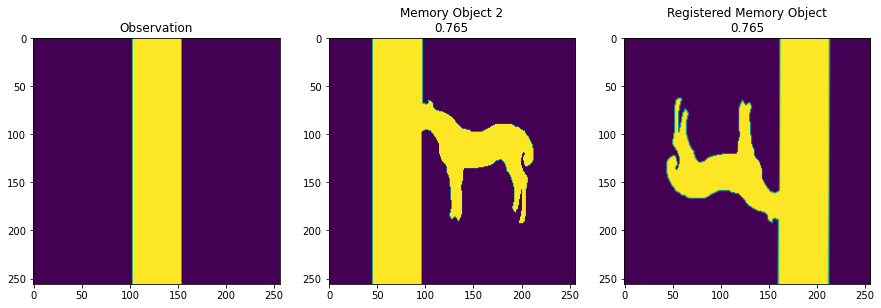

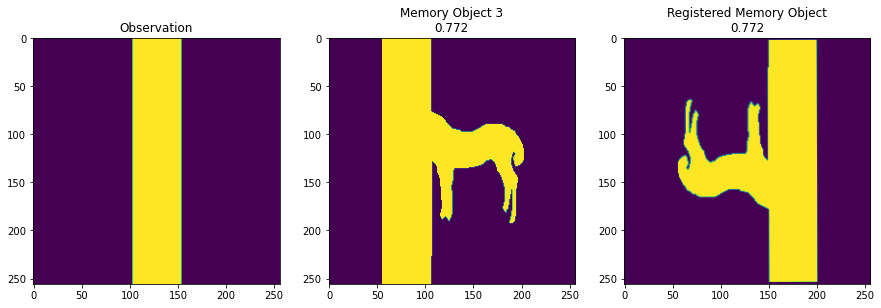

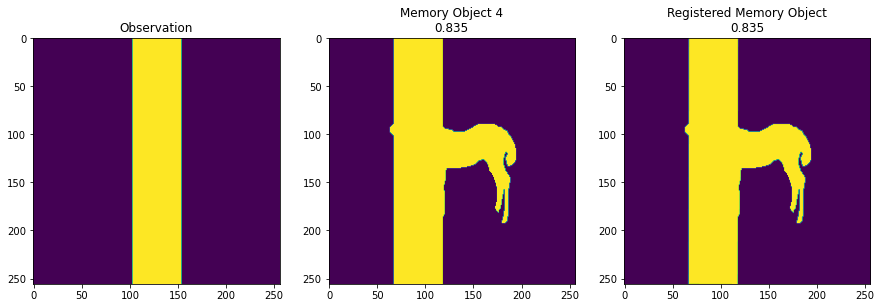

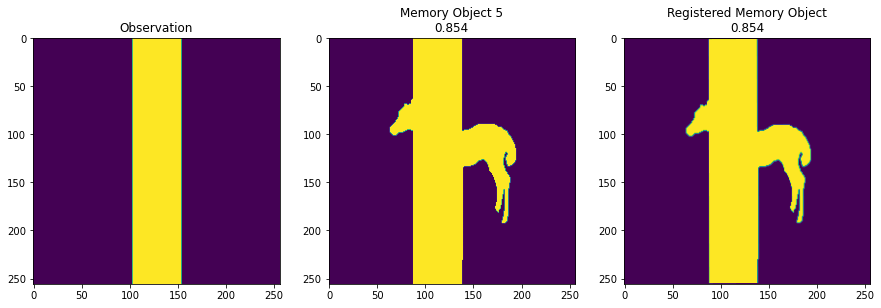

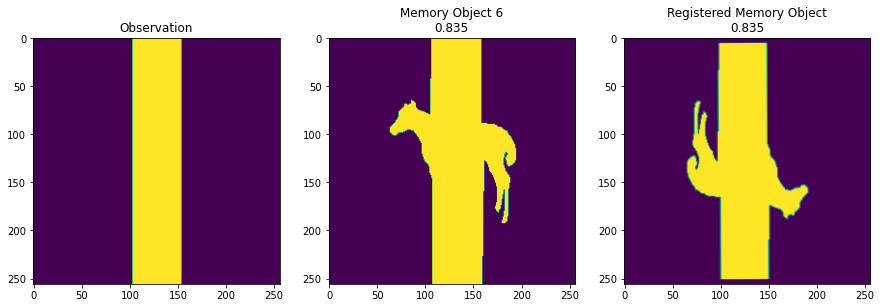

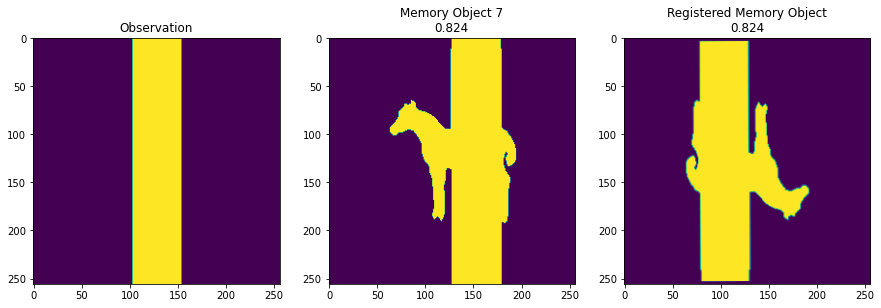

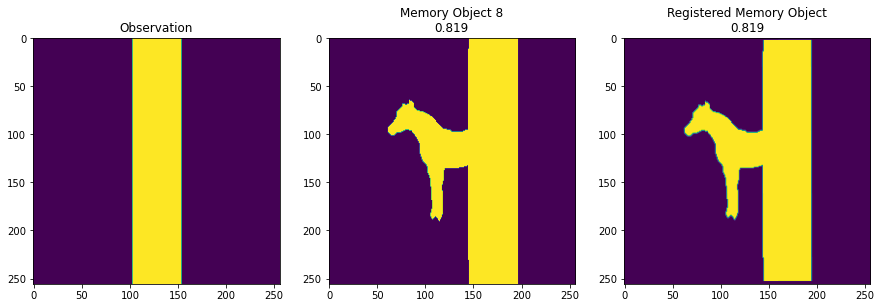

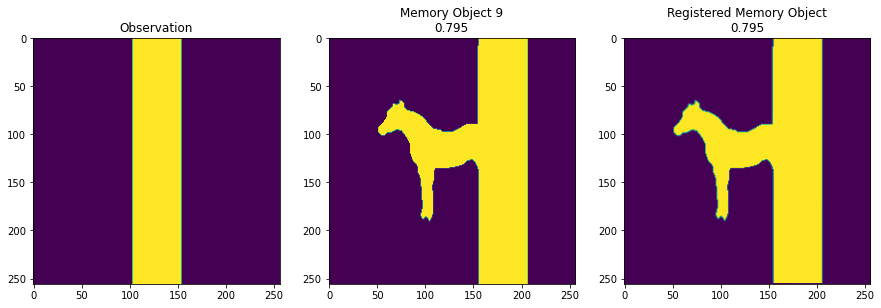

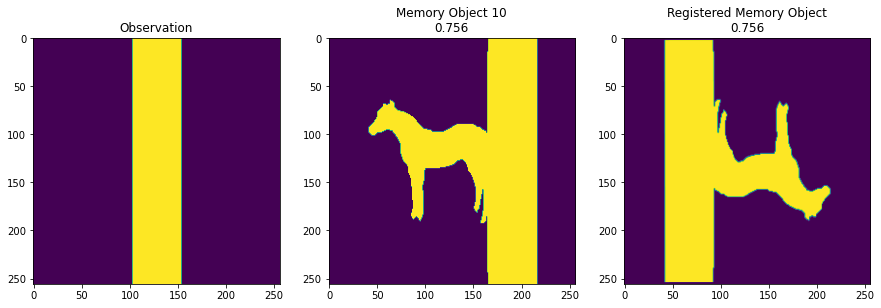

Best Score:   0.998044956517216


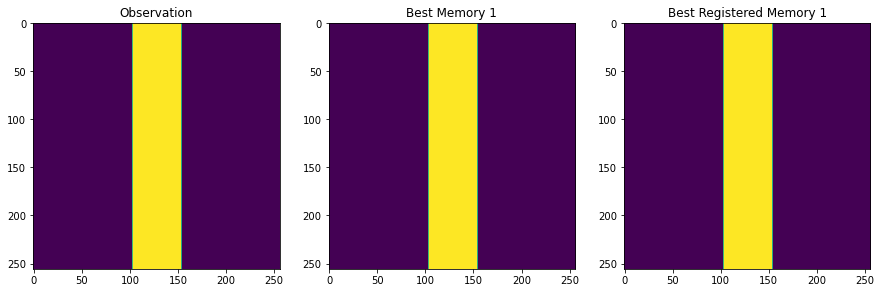



Size of Memory  11     Updating Memory 0.998                   Elapsed time:   5.072






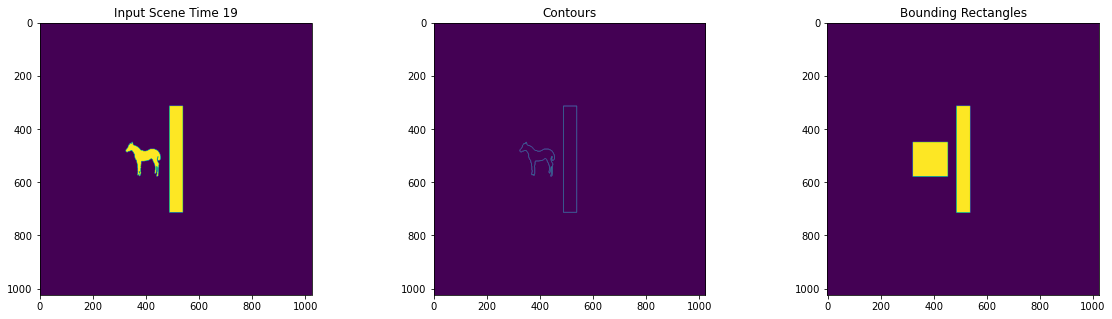

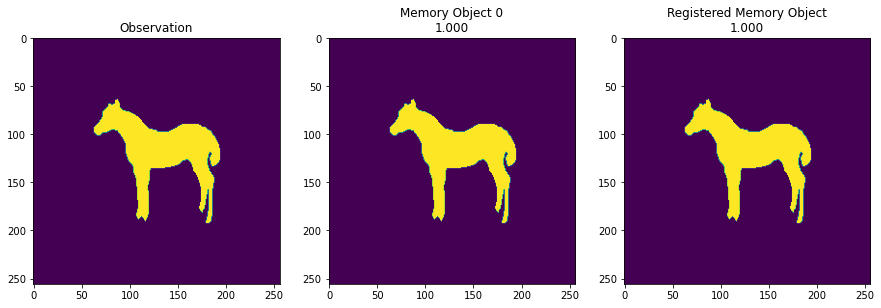

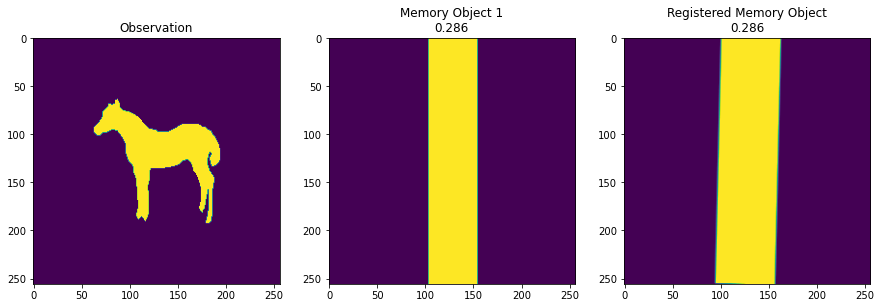

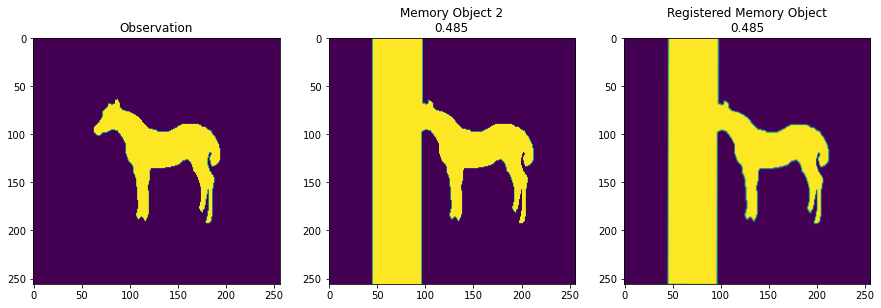

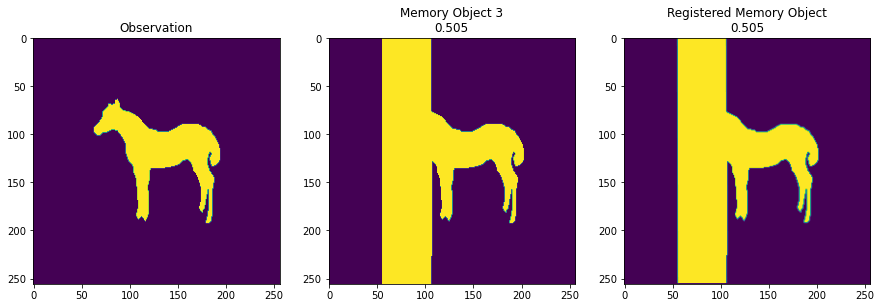

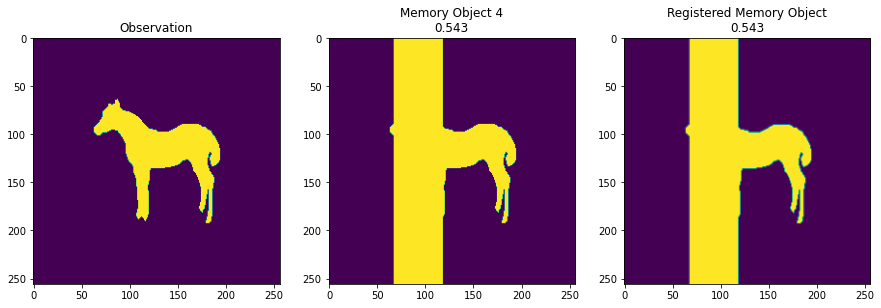

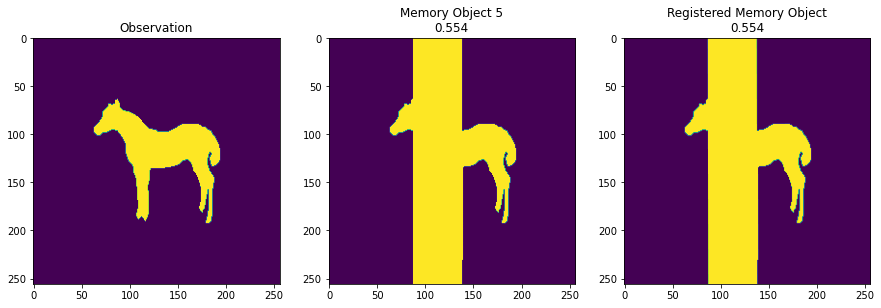

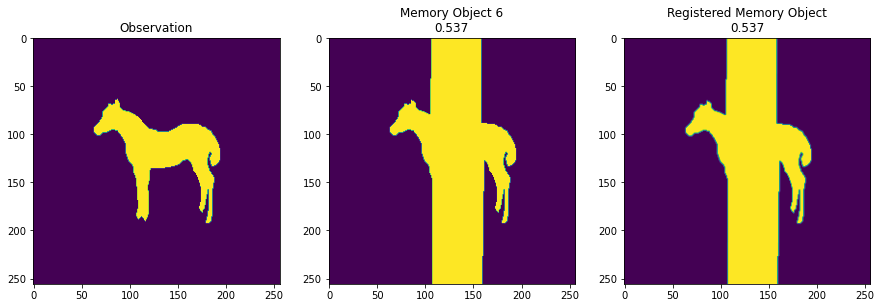

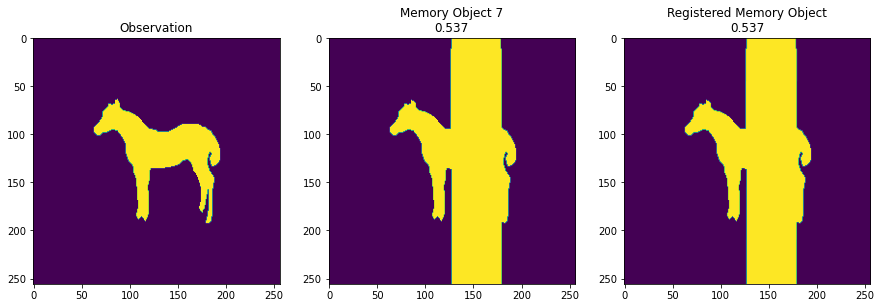

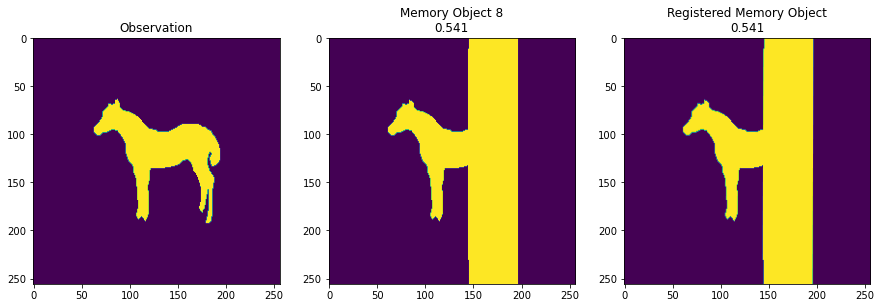

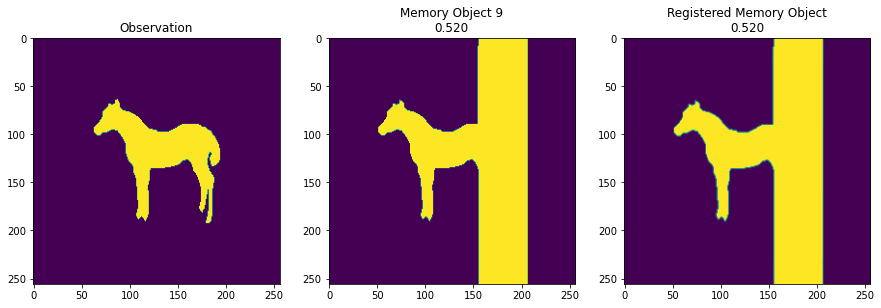

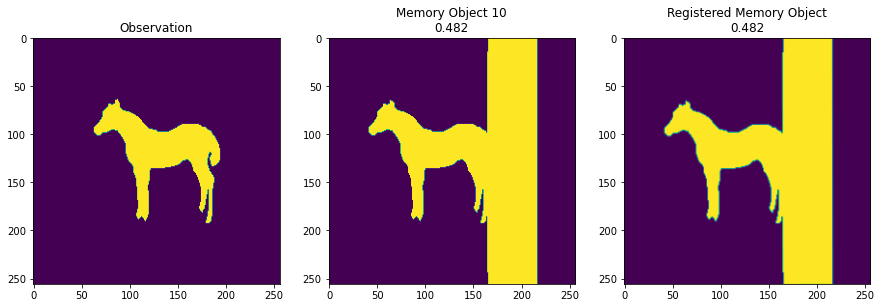

Best Score:   1.0


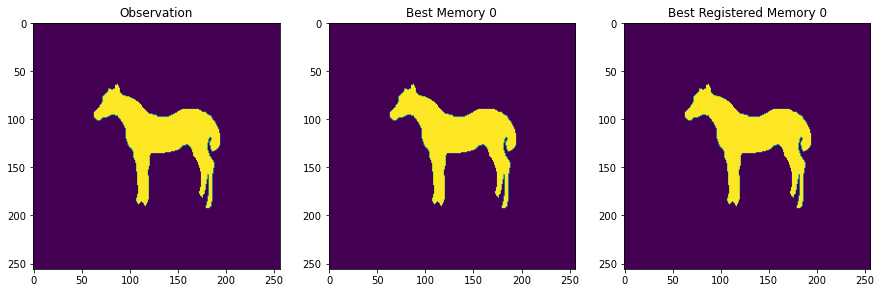



Size of Memory  11     Updating Memory 1.000                   Elapsed time:   5.025






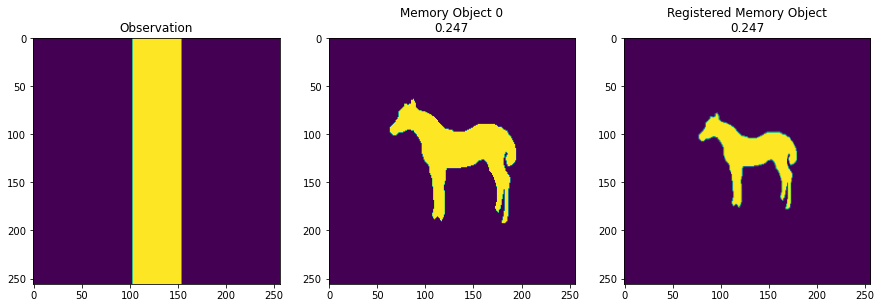

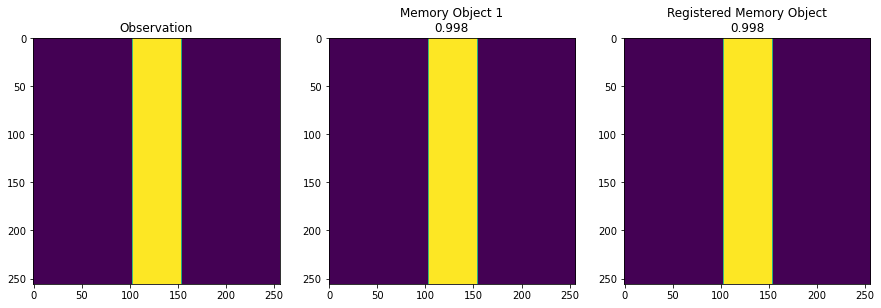

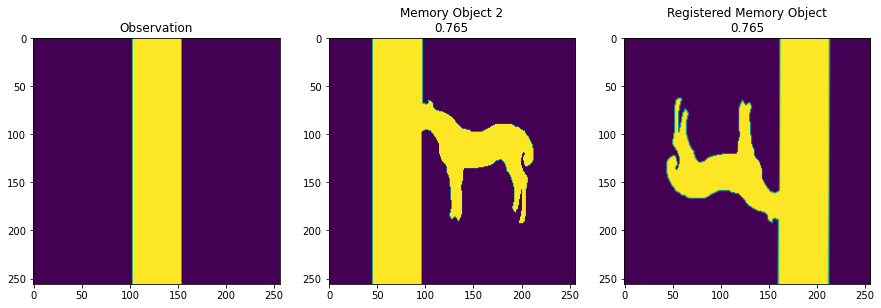

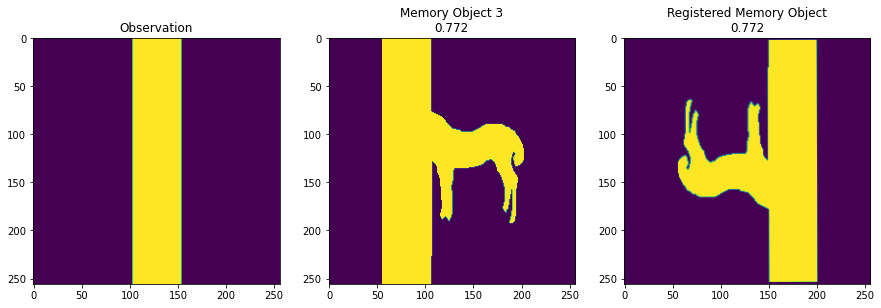

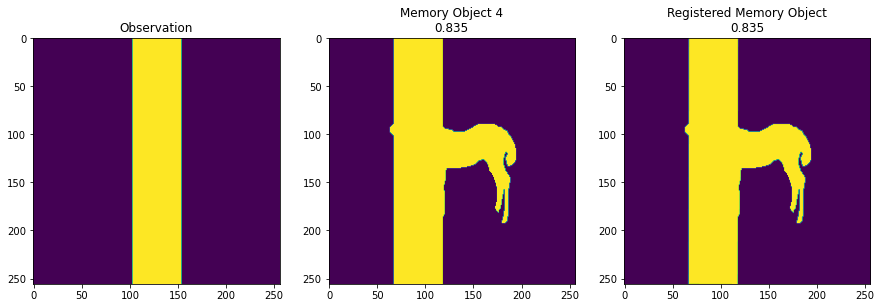

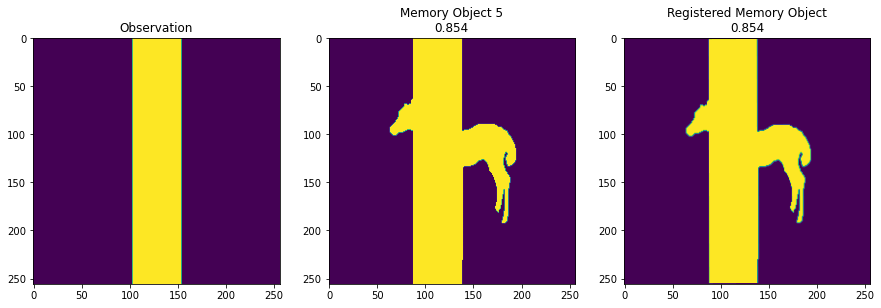

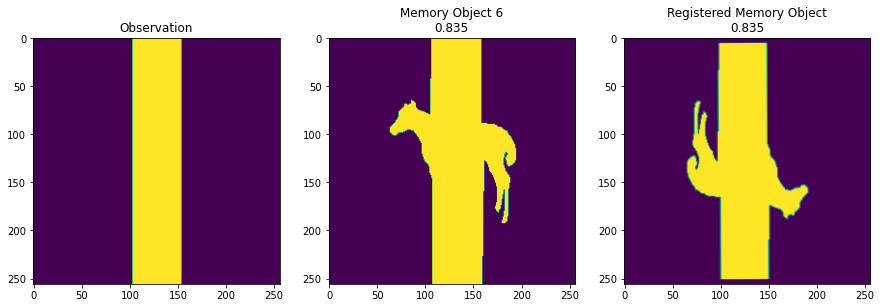

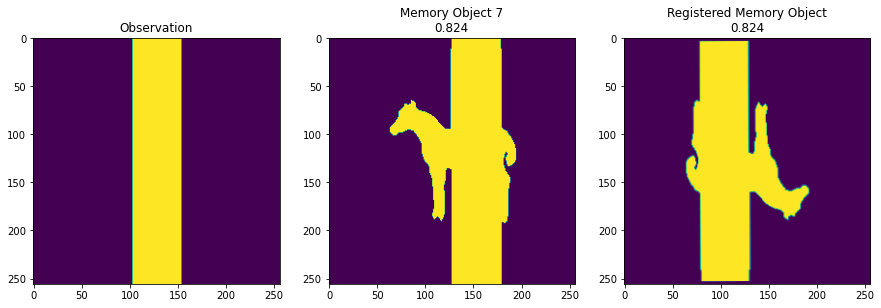

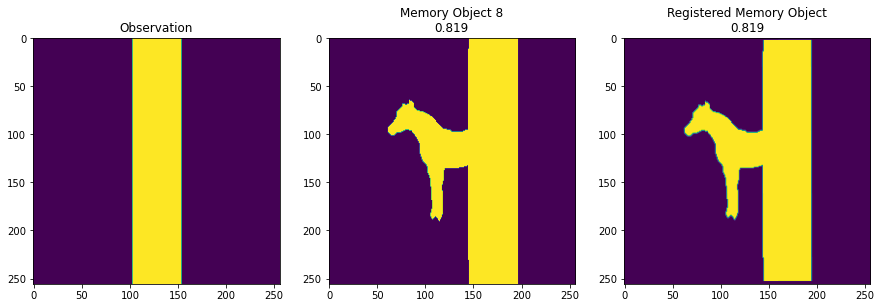

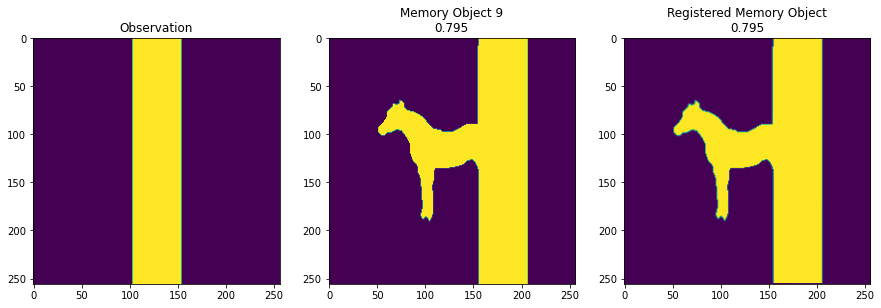

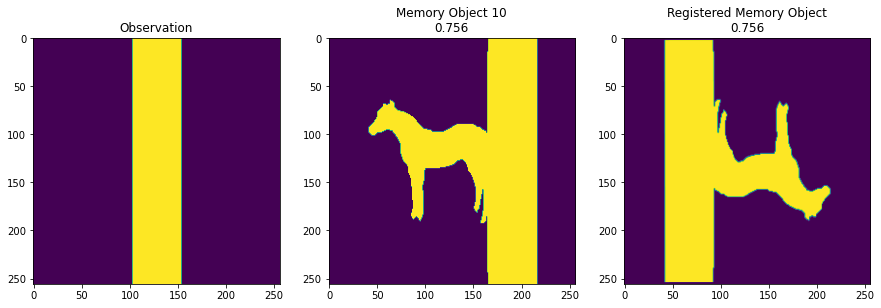

Best Score:   0.998044956517216


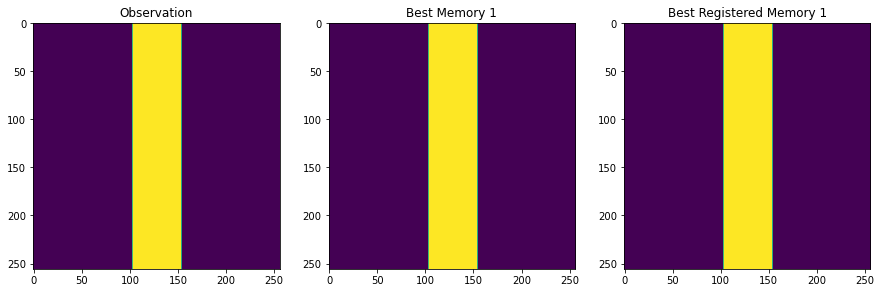



Size of Memory  11     Updating Memory 0.998                   Elapsed time:   4.973






In [9]:
for t in range(20):

    sceneImg = np.zeros((sceneHeight,sceneWidth),np.uint8)
    xcoord = sceneWidth//2 + imgWidth//2 - t*20
    ycoord = sceneHeight//2 - imgHeight//2
    sceneImg = cv.rectangle(sceneImg,(sceneWidth//2-width,sceneHeight//2-height),(sceneWidth//2+width,sceneHeight//2+height),(255),-1)
    sceneImg[ycoord:ycoord+imgHeight,xcoord:xcoord+imgWidth] = cv.bitwise_or(sceneImg[ycoord:ycoord+imgHeight,xcoord:xcoord+imgWidth],255-shapeDescs[shape]['imag'])
    
#
# The edged image introduces artifacts that break some single contours into multiples. This gives "inner" and "outer"
# (or "out-and-back" contours).  One fix is to just findContours on sceneImg (this will depend on what exactly the
# image contains--BW vs RGB, etc.).
    # edgedImage = cv.Canny(sceneImg, 0, 255)
    cnts,hier = cv.findContours(sceneImg, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_TC89_KCOS)
    # contImage1 = cv.drawContours(np.zeros((sceneHeight,sceneWidth),np.uint8),cnts,-1,(255),1)

# Find bounding rectangles of the contours and build aggregate mask.
    tempImage = np.zeros((sceneHeight,sceneWidth),np.uint8)
    for icnt,cnt in enumerate(cnts):
        x,y,w,h = cv.boundingRect(cnt)
        tempImage = cv.rectangle(tempImage,(x,y),(x+w,y+h),(255),-1)

# Find new contours for aggregate mask.
    cntsBR,hierBR = cv.findContours(tempImage, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_TC89_KCOS)

    fig,axs = plt.subplots(1,3,figsize=(20,5))
    axs[0].imshow(sceneImg)
    axs[0].set_title('Input Scene Time {0:d}'.format(t))
    axs[1].imshow(cv.drawContours(np.zeros((sceneHeight,sceneWidth),np.uint8),cnts,-1,(255),1))
    axs[1].set_title('Contours')
    axs[2].imshow(cv.drawContours(np.zeros((sceneHeight,sceneWidth),np.uint8),cntsBR,-1,(255),-1))
    axs[2].set_title('Bounding Rectangles')
    plt.show()

    for icnt,cnt in enumerate(cnts):
        if cv.contourArea(cnt) > 100.:
            msgStr = ''

            k1 = icnt
            iObs = icnt

            xx1 = [x[0][0] for x in cntsBR[icnt]]
            yy1 = [x[0][1] for x in cntsBR[icnt]]
            xcBR = (xx1[2] + xx1[0])//2
            ycBR = (yy1[1] + yy1[0])//2
            x0 = xcBR - imgWidth//2
            x1 = xcBR + imgWidth//2
            y0 = ycBR - imgHeight//2
            y1 = ycBR + imgHeight//2
            obsImg = cv.drawContours(np.zeros((sceneHeight,sceneWidth),np.uint8),cnts,icnt,(255),-1)[y0:y1,x0:x1]
            obsCnt = cv.drawContours(np.zeros((sceneHeight,sceneWidth),np.uint8),cnts,icnt,(255), 1)[y0:y1,x0:x1]

            start_time = time.time()

            if len(learnDict) == 0:
                msgStr = 'Cold Start:  Learning First Object'
                learnDict[labelDict] = initializeMemoryObject(k1,obsImg,obsCnt)
                labelDict += 1

                if plotFlag1:
                    if matchContour:
                        plt.imshow(obsCnt)
                    else:
                        plt.imshow(obsImg)
                    plt.title('Initial Observation')
                    plt.show()
                    print('\n')
            else:
                scores = []
                reslts = []
                recovs = []
                for entry in learnDict:
                    # Use the current image or contour data (observation and memory model)
                    padVal = 0
                    if matchContour:
                        recover,result = registerMain(obsCnt,learnDict[entry]['mdlcnt'],imgWidth,imgHeight,imgWidth//2,imgHeight//2,padVal)
                        res = normxcorr2(obsCnt,recover,mode = 'same')
                    else:
                        recover,result = registerMain(obsImg,learnDict[entry]['mdlimg'],imgWidth,imgHeight,imgWidth//2,imgHeight//2,padVal)
                        res = normxcorr2(obsImg,recover,mode = 'same')
                    min_val,max_val,min_loc,max_loc = cv.minMaxLoc(res)
                    scores.append(max_val)
                    reslts.append(result)
                    recovs.append(recover)

                    if (plotFlag1): #  and (t == 0):
                        fig,axs = plt.subplots(1,3,figsize=(15,5))
                        if matchContour:
                            axs[0].imshow(obsCnt)
                            axs[1].imshow(learnDict[entry]['mdlcnt'])
                        else:
                            axs[0].imshow(obsImg)
                            axs[1].imshow(learnDict[entry]['mdlimg'])
                        axs[0].set_title('Observation')
                        axs[1].set_title('Memory Object {0:d}\n{1:5.3f}'.format(entry,max_val))

                        axs[2].imshow(recover)
                        axs[2].set_title('Registered Memory Object\n{0:5.3f}'.format(max_val))
                        plt.show()

                maxndx = np.argmax(scores)
                maxval = scores[maxndx]

                if plotFlag1:
                    print('Best Score:  ',maxval)
                    fig,axs = plt.subplots(1,3,figsize=(15,5))
                    axs[0].imshow(obsImg)
                    axs[0].set_title('Observation')
                    axs[1].imshow(learnDict[maxndx]['mdlimg'])
                    axs[1].set_title('Best Memory {0:d}'.format(maxndx))
                    axs[2].imshow(recovs[maxndx])
                    axs[2].set_title('Best Registered Memory {0:d}'.format(maxndx))
                    plt.show()
                    print('\n')

                if maxval < matchThreshold:
                    msgStr = 'Learning New Object {0:5.3f}'.format(maxval)
                    learnDict[labelDict] = initializeMemoryObject(k1,obsImg,obsCnt)
                    labelDict += 1
                else:
                    msgStr = 'Updating Memory {0:5.3f}'.format(maxval)
                    updkey = list(learnDict.keys())[maxndx]
                    params = k1,iObs,reslts[maxndx]['scale'],reslts[maxndx]['angle'],np.max(scores)
                    learnDict[updkey] = updateMemoryObject(learnDict[updkey],obsImg,obsCnt,recovs[maxndx], params)

            end_time = time.time()
            print('Size of Memory  {0:2d}'.format(len(learnDict)),end=' '*5)
            print('{0:35s}'.format(msgStr),end=' '*5)
            print('Elapsed time:  {0:6.3f}'.format(end_time-start_time))

            print('\n\n\n')